In [2]:
#pip install dash
#pip install xgboost

In [251]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from xgboost.sklearn import XGBRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import BayesianRidge
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Lasso
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
import xgboost as xgb
from sklearn.model_selection import TimeSeriesSplit
from sklearn.preprocessing import MinMaxScaler
#color_pal = sns.color_palette()
#plt.style.use('fivethirtyeight')

# Data Reading 

In [252]:
df=pd.read_excel("D:\\GDP\\Needed data For GDP prediction - 18-10-2022.xlsx",sheet_name='Data')
df

,Time Frame,Date,Total Final consumption at market prices & constant prices (L.E B.),Total investment and stock at market prices & constant prices (L.E B.),Exports of goods and services (L.E B.),Imports of goods and services (L.E B.),GDP at cat market prices & constant prices (L.E B.)\n(Consumption+Investment+Exports-Imorts),GDP Per Capita (000 $),"Inflation Rate, annually change (%) (Total Egypt) - IFS, IMF",Total Domestic Debt\n(L.E B.)\nCBE,Workers Remittance ($ Million),Unemployment Rate %,GDP Growth Rate ( annual) (%),Egypt's Purchasing Managers' Index,Global JP MORGAN PMI: COMPOSITE - S&P Global,Global JP MORGAN PMI: Manufacturing- S&P Global,Global JP MORGAN PMI: ٍServices - S&P Global
0,الربع الأول 2002/2001,2001-09-30,387.63,71.64,76.91,97.57,438.61,NaN,2.165570,295.053,759.2,-,-,NaN,-,-,-
1,الربع الثاني 2002/2001,2001-12-31,401.86,76.87,78.82,103.14,454.41,NaN,2.320502,297.549,783.7,-,-,NaN,-,-,-
2,الربع الثالث 2002/2001,2002-03-31,421.28,79.87,91.36,105.97,486.53,NaN,2.603037,305.646,655.2,-,-,NaN,-,-,-
3,الربع الرابع 2002/2001,2002-06-30,382.49,105.10,91.96,112.17,467.38,NaN,2.644360,329.800,754.4,-,-,NaN,-,-,-
4,الربع الأول 2003/2002,2002-09-30,407.09,68.82,91.62,114.42,453.11,NaN,2.736786,343.555,738.4,-,3.3,NaN,-,-,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,الربع الأول 2022/2021,2021-09-30,NaN,NaN,NaN,NaN,NaN,NaN,5.891552,NaN,8145.9,7.5,9.8,49.266667,53.9,54.5,54.3
81,الربع الثاتي 2022/2021,2021-12-31,NaN,NaN,NaN,NaN,NaN,NaN,5.887123,NaN,7437.2,7.4,8.3,48.800000,54.5,54.2,55.3
82,الربع الثالث 2022/2021,2022-03-31,NaN,NaN,NaN,NaN,NaN,NaN,8.849226,NaN,8045.7,7.2,5.4,47.500000,52.4,53.3,52.8
83,الربع الراابع 2021/2022,2022-06-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.2,NaN,46.366667,52,52.3,52.7


# Replace '-' by non

In [253]:
df.replace(to_replace='-',value=np.nan,inplace=True)
df

,Time Frame,Date,Total Final consumption at market prices & constant prices (L.E B.),Total investment and stock at market prices & constant prices (L.E B.),Exports of goods and services (L.E B.),Imports of goods and services (L.E B.),GDP at cat market prices & constant prices (L.E B.)\n(Consumption+Investment+Exports-Imorts),GDP Per Capita (000 $),"Inflation Rate, annually change (%) (Total Egypt) - IFS, IMF",Total Domestic Debt\n(L.E B.)\nCBE,Workers Remittance ($ Million),Unemployment Rate %,GDP Growth Rate ( annual) (%),Egypt's Purchasing Managers' Index,Global JP MORGAN PMI: COMPOSITE - S&P Global,Global JP MORGAN PMI: Manufacturing- S&P Global,Global JP MORGAN PMI: ٍServices - S&P Global
0,الربع الأول 2002/2001,2001-09-30,387.63,71.64,76.91,97.57,438.61,NaN,2.165570,295.053,759.2,NaN,NaN,NaN,NaN,NaN,NaN
1,الربع الثاني 2002/2001,2001-12-31,401.86,76.87,78.82,103.14,454.41,NaN,2.320502,297.549,783.7,NaN,NaN,NaN,NaN,NaN,NaN
2,الربع الثالث 2002/2001,2002-03-31,421.28,79.87,91.36,105.97,486.53,NaN,2.603037,305.646,655.2,NaN,NaN,NaN,NaN,NaN,NaN
3,الربع الرابع 2002/2001,2002-06-30,382.49,105.10,91.96,112.17,467.38,NaN,2.644360,329.800,754.4,NaN,NaN,NaN,NaN,NaN,NaN
4,الربع الأول 2003/2002,2002-09-30,407.09,68.82,91.62,114.42,453.11,NaN,2.736786,343.555,738.4,NaN,3.3,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,الربع الأول 2022/2021,2021-09-30,NaN,NaN,NaN,NaN,NaN,NaN,5.891552,NaN,8145.9,7.5,9.8,49.266667,53.9,54.5,54.3
81,الربع الثاتي 2022/2021,2021-12-31,NaN,NaN,NaN,NaN,NaN,NaN,5.887123,NaN,7437.2,7.4,8.3,48.800000,54.5,54.2,55.3
82,الربع الثالث 2022/2021,2022-03-31,NaN,NaN,NaN,NaN,NaN,NaN,8.849226,NaN,8045.7,7.2,5.4,47.500000,52.4,53.3,52.8
83,الربع الراابع 2021/2022,2022-06-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.2,NaN,46.366667,52.0,52.3,52.7


In [254]:
df.iloc[:,3]

0      71.64
1      76.87
2      79.87
3     105.10
4      68.82
       ...  
80       NaN
81       NaN
82       NaN
83       NaN
84       NaN
Name: Total investment and stock  at market prices & constant  prices (L.E B.) , Length: 85, dtype: float64

# Descriptive analysis

In [255]:
df.describe()

,Total Final consumption at market prices & constant prices (L.E B.),Total investment and stock at market prices & constant prices (L.E B.),Exports of goods and services (L.E B.),Imports of goods and services (L.E B.),GDP at cat market prices & constant prices (L.E B.)\n(Consumption+Investment+Exports-Imorts),GDP Per Capita (000 $),"Inflation Rate, annually change (%) (Total Egypt) - IFS, IMF",Total Domestic Debt\n(L.E B.)\nCBE,Workers Remittance ($ Million),Unemployment Rate %,GDP Growth Rate ( annual) (%),Egypt's Purchasing Managers' Index,Global JP MORGAN PMI: COMPOSITE - S&P Global,Global JP MORGAN PMI: Manufacturing- S&P Global,Global JP MORGAN PMI: ٍServices - S&P Global
count,80.000000,80.000000,80.000000,80.000000,80.000000,42.000000,83.000000,76.000000,83.000000,78.000000,79.000000,21.000000,19.000000,19.000000,18.000000
mean,652.868625,119.705250,140.264500,190.241000,722.597625,9355.700587,10.100703,1562.327092,3764.814458,10.449615,4.473418,48.182540,51.652632,51.742105,51.733333
std,185.598438,32.854323,37.084263,49.020435,174.005074,512.238962,6.130527,1302.659961,2402.596320,1.974968,2.256939,2.548079,4.233775,2.811547,4.718798
min,379.210000,59.740000,76.910000,97.570000,438.610000,8523.918530,2.165570,295.053000,655.200000,7.200000,-4.300000,38.333333,36.800000,43.300000,35.600000
25%,481.130000,92.610000,108.322500,161.412500,577.620000,8996.094909,5.763919,582.713750,1383.300000,8.932500,3.300000,47.500000,51.500000,50.450000,51.675000
50%,641.240000,118.520000,147.355000,183.215000,722.365000,9231.043905,9.551989,982.102000,4067.000000,10.485000,4.900000,49.050000,52.700000,52.300000,52.750000
75%,794.445000,142.795000,165.550000,218.470000,843.162500,9727.313506,12.125790,2286.508750,5768.200000,12.400000,5.600000,49.533333,53.650000,53.650000,53.400000
max,1033.500000,193.700000,233.610000,309.000000,1066.300000,10464.180569,32.145973,4742.107000,8145.900000,13.400000,9.800000,50.166667,57.200000,55.800000,58.000000


In [256]:
df = df.set_index('Date')
#df.index = pd.to_datetime(df.index)
df

,Time Frame,Total Final consumption at market prices & constant prices (L.E B.),Total investment and stock at market prices & constant prices (L.E B.),Exports of goods and services (L.E B.),Imports of goods and services (L.E B.),GDP at cat market prices & constant prices (L.E B.)\n(Consumption+Investment+Exports-Imorts),GDP Per Capita (000 $),"Inflation Rate, annually change (%) (Total Egypt) - IFS, IMF",Total Domestic Debt\n(L.E B.)\nCBE,Workers Remittance ($ Million),Unemployment Rate %,GDP Growth Rate ( annual) (%),Egypt's Purchasing Managers' Index,Global JP MORGAN PMI: COMPOSITE - S&P Global,Global JP MORGAN PMI: Manufacturing- S&P Global,Global JP MORGAN PMI: ٍServices - S&P Global
Date,,,,,,,,,,,,,,,,
2001-09-30,الربع الأول 2002/2001,387.63,71.64,76.91,97.57,438.61,NaN,2.165570,295.053,759.2,NaN,NaN,NaN,NaN,NaN,NaN
2001-12-31,الربع الثاني 2002/2001,401.86,76.87,78.82,103.14,454.41,NaN,2.320502,297.549,783.7,NaN,NaN,NaN,NaN,NaN,NaN
2002-03-31,الربع الثالث 2002/2001,421.28,79.87,91.36,105.97,486.53,NaN,2.603037,305.646,655.2,NaN,NaN,NaN,NaN,NaN,NaN
2002-06-30,الربع الرابع 2002/2001,382.49,105.10,91.96,112.17,467.38,NaN,2.644360,329.800,754.4,NaN,NaN,NaN,NaN,NaN,NaN
2002-09-30,الربع الأول 2003/2002,407.09,68.82,91.62,114.42,453.11,NaN,2.736786,343.555,738.4,NaN,3.3,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-09-30,الربع الأول 2022/2021,NaN,NaN,NaN,NaN,NaN,NaN,5.891552,NaN,8145.9,7.5,9.8,49.266667,53.9,54.5,54.3
2021-12-31,الربع الثاتي 2022/2021,NaN,NaN,NaN,NaN,NaN,NaN,5.887123,NaN,7437.2,7.4,8.3,48.800000,54.5,54.2,55.3
2022-03-31,الربع الثالث 2022/2021,NaN,NaN,NaN,NaN,NaN,NaN,8.849226,NaN,8045.7,7.2,5.4,47.500000,52.4,53.3,52.8


In [257]:
df.drop(['Time Frame'],axis=1,inplace=True)
df

,Total Final consumption at market prices & constant prices (L.E B.),Total investment and stock at market prices & constant prices (L.E B.),Exports of goods and services (L.E B.),Imports of goods and services (L.E B.),GDP at cat market prices & constant prices (L.E B.)\n(Consumption+Investment+Exports-Imorts),GDP Per Capita (000 $),"Inflation Rate, annually change (%) (Total Egypt) - IFS, IMF",Total Domestic Debt\n(L.E B.)\nCBE,Workers Remittance ($ Million),Unemployment Rate %,GDP Growth Rate ( annual) (%),Egypt's Purchasing Managers' Index,Global JP MORGAN PMI: COMPOSITE - S&P Global,Global JP MORGAN PMI: Manufacturing- S&P Global,Global JP MORGAN PMI: ٍServices - S&P Global
Date,,,,,,,,,,,,,,,
2001-09-30,387.63,71.64,76.91,97.57,438.61,NaN,2.165570,295.053,759.2,NaN,NaN,NaN,NaN,NaN,NaN
2001-12-31,401.86,76.87,78.82,103.14,454.41,NaN,2.320502,297.549,783.7,NaN,NaN,NaN,NaN,NaN,NaN
2002-03-31,421.28,79.87,91.36,105.97,486.53,NaN,2.603037,305.646,655.2,NaN,NaN,NaN,NaN,NaN,NaN
2002-06-30,382.49,105.10,91.96,112.17,467.38,NaN,2.644360,329.800,754.4,NaN,NaN,NaN,NaN,NaN,NaN
2002-09-30,407.09,68.82,91.62,114.42,453.11,NaN,2.736786,343.555,738.4,NaN,3.3,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-09-30,NaN,NaN,NaN,NaN,NaN,NaN,5.891552,NaN,8145.9,7.5,9.8,49.266667,53.9,54.5,54.3
2021-12-31,NaN,NaN,NaN,NaN,NaN,NaN,5.887123,NaN,7437.2,7.4,8.3,48.800000,54.5,54.2,55.3
2022-03-31,NaN,NaN,NaN,NaN,NaN,NaN,8.849226,NaN,8045.7,7.2,5.4,47.500000,52.4,53.3,52.8


# EDA

In [263]:
scaler = MinMaxScaler()
df_min_max=scaler.fit_transform(df)
df_min_max=pd.DataFrame(df_min_max,columns=df.columns,index=df.index)
df_min_max
import plotly.express as px
fig = px.line(df_min_max,x=df_min_max.index,y=df_min_max.columns,width=1200, height=500,markers=True)
fig.show()

In [264]:
""""""""""
#f, ax = plt.subplots(nrows=2, ncols=2, figsize=(2*width, 2*height))
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

# Have some time series data (via pandas)


# Select relevant data, index by Date
data = df.set_index(['Date'])

plot_acf(data['Unemployment Rate %'])

# Show the data as a plot (via matplotlib)
plt.show()
"""""""""""

'"\n#f, ax = plt.subplots(nrows=2, ncols=2, figsize=(2*width, 2*height))\nimport pandas as pd\nfrom matplotlib import pyplot as plt\nfrom statsmodels.graphics.tsaplots import plot_acf\n\n# Have some time series data (via pandas)\n\n\n# Select relevant data, index by Date\ndata = df.set_index([\'Date\'])\n\nplot_acf(data[\'Unemployment Rate %\'])\n\n# Show the data as a plot (via matplotlib)\nplt.show()\n'

In [265]:
""""""""""
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt
# Use the Autocorrelation function
# from the statsmodel library passing
# our DataFrame object in as the data
# Note: Limiting Lags to 50
plot_acf(df['GDP Growth Rate ( annual) (%)'],lags=84)
# Show the AR as a plot
plt.show()
"""""""""

'"\nfrom statsmodels.graphics.tsaplots import plot_acf\nimport matplotlib.pyplot as plt\n# Use the Autocorrelation function\n# from the statsmodel library passing\n# our DataFrame object in as the data\n# Note: Limiting Lags to 50\nplot_acf(df[\'GDP Growth Rate ( annual) (%)\'],lags=84)\n# Show the AR as a plot\nplt.show()\n'

In [35]:
"""""""""
plot_acf(df['GDP Growth Rate ( annual) (%)'], lags=50, title='ACF on non-stationary')
#plot_pacf(train_mini['Close'], lags=20, ax=ax[0, 1], method='ols', title='PACF on non-stationary')
"""""""""

"\nplot_acf(df['GDP Growth Rate ( annual) (%)'], lags=50, title='ACF on non-stationary')\n#plot_pacf(train_mini['Close'], lags=20, ax=ax[0, 1], method='ols', title='PACF on non-stationary')\n"

In [221]:
#df.shift(periods=3, fill_value=0).tail()

In [222]:
#print(df.shift(periods=2, fill_value=0))

In [223]:
#df.shift(-1)

# Data preprocessing

In [266]:
df=df.loc[:'2021-6-30']
df

,Total Final consumption at market prices & constant prices (L.E B.),Total investment and stock at market prices & constant prices (L.E B.),Exports of goods and services (L.E B.),Imports of goods and services (L.E B.),GDP at cat market prices & constant prices (L.E B.)\n(Consumption+Investment+Exports-Imorts),GDP Per Capita (000 $),"Inflation Rate, annually change (%) (Total Egypt) - IFS, IMF",Total Domestic Debt\n(L.E B.)\nCBE,Workers Remittance ($ Million),Unemployment Rate %,GDP Growth Rate ( annual) (%),Egypt's Purchasing Managers' Index,Global JP MORGAN PMI: COMPOSITE - S&P Global,Global JP MORGAN PMI: Manufacturing- S&P Global,Global JP MORGAN PMI: ٍServices - S&P Global
Date,,,,,,,,,,,,,,,
2001-09-30,387.63,71.64,76.91,97.57,438.61,NaN,2.165570,295.053,759.2,NaN,NaN,NaN,NaN,NaN,NaN
2001-12-31,401.86,76.87,78.82,103.14,454.41,NaN,2.320502,297.549,783.7,NaN,NaN,NaN,NaN,NaN,NaN
2002-03-31,421.28,79.87,91.36,105.97,486.53,NaN,2.603037,305.646,655.2,NaN,NaN,NaN,NaN,NaN,NaN
2002-06-30,382.49,105.10,91.96,112.17,467.38,NaN,2.644360,329.800,754.4,NaN,NaN,NaN,NaN,NaN,NaN
2002-09-30,407.09,68.82,91.62,114.42,453.11,NaN,2.736786,343.555,738.4,NaN,3.3,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-30,1018.60,82.60,85.10,196.30,990.00,9850.746269,5.400240,4742.107,7869.0,9.6,-1.7,38.333333,36.8,43.3,35.6
2020-09-30,957.60,93.20,97.80,166.00,982.60,9738.354807,3.753137,NaN,8028.1,7.3,0.7,49.800000,52.0,51.6,51.6
2020-12-31,977.40,119.80,106.40,179.00,1024.60,10114.511352,5.213860,NaN,7493.3,7.2,2.0,50.166667,53.0,53.6,52.3


- Filling Nulls

In [267]:
df.isna().sum()

Total Final consumption at market prices & constant  prices (L.E B.)                              0
Total investment and stock  at market prices & constant  prices (L.E B.)                          0
Exports of goods and services (L.E B.)                                                            0
Imports of goods and services (L.E B.)                                                            0
GDP at cat market prices & constant  prices (L.E B.)\n(Consumption+Investment+Exports-Imorts)     0
GDP Per Capita (000 $)                                                                           38
Inflation Rate, annually change (%) (Total  Egypt) - IFS, IMF                                     0
Total Domestic Debt\n(L.E B.)\nCBE                                                                4
Workers Remittance ($  Million)                                                                   0
Unemployment Rate %                                                                               6


In [268]:
#df=df.fillna(df.median()) # using median to fill nulls
#df.head(80)
df=df.ffill() 
df=df.bfill()
df

,Total Final consumption at market prices & constant prices (L.E B.),Total investment and stock at market prices & constant prices (L.E B.),Exports of goods and services (L.E B.),Imports of goods and services (L.E B.),GDP at cat market prices & constant prices (L.E B.)\n(Consumption+Investment+Exports-Imorts),GDP Per Capita (000 $),"Inflation Rate, annually change (%) (Total Egypt) - IFS, IMF",Total Domestic Debt\n(L.E B.)\nCBE,Workers Remittance ($ Million),Unemployment Rate %,GDP Growth Rate ( annual) (%),Egypt's Purchasing Managers' Index,Global JP MORGAN PMI: COMPOSITE - S&P Global,Global JP MORGAN PMI: Manufacturing- S&P Global,Global JP MORGAN PMI: ٍServices - S&P Global
Date,,,,,,,,,,,,,,,
2001-09-30,387.63,71.64,76.91,97.57,438.61,8816.328570,2.165570,295.053,759.2,9.96,3.3,47.400000,54.1,53.7,54.1
2001-12-31,401.86,76.87,78.82,103.14,454.41,8816.328570,2.320502,297.549,783.7,9.96,3.3,47.400000,54.1,53.7,54.1
2002-03-31,421.28,79.87,91.36,105.97,486.53,8816.328570,2.603037,305.646,655.2,9.96,3.3,47.400000,54.1,53.7,54.1
2002-06-30,382.49,105.10,91.96,112.17,467.38,8816.328570,2.644360,329.800,754.4,9.96,3.3,47.400000,54.1,53.7,54.1
2002-09-30,407.09,68.82,91.62,114.42,453.11,8816.328570,2.736786,343.555,738.4,9.96,3.3,47.400000,54.1,53.7,54.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-30,1018.60,82.60,85.10,196.30,990.00,9850.746269,5.400240,4742.107,7869.0,9.60,-1.7,38.333333,36.8,43.3,35.6
2020-09-30,957.60,93.20,97.80,166.00,982.60,9738.354807,3.753137,4742.107,8028.1,7.30,0.7,49.800000,52.0,51.6,51.6
2020-12-31,977.40,119.80,106.40,179.00,1024.60,10114.511352,5.213860,4742.107,7493.3,7.20,2.0,50.166667,53.0,53.6,52.3


- Set Date as index

In [115]:
#df = df.set_index('Date')
#df.index = pd.to_datetime(df.index)

In [116]:
idx=df.columns.get_loc('GDP Growth Rate ( annual) (%)')
idx

10

- Scalling

In [117]:
#scaler = MinMaxScaler()
#df_min_max=scaler.fit_transform(df)
#df_min_max=pd.DataFrame(df_min_max,columns=df.columns,index=df.index)
#df_min_max

# Feature engineering  

- Trial one 

In [118]:
from pandas import DataFrame
from pandas import concat

def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	"""
	Frame a time series as a supervised learning dataset.
	Arguments:
		data: Sequence of observations as a list or NumPy array.
		n_in: Number of lag observations as input (X).
		n_out: Number of observations as output (y).
		dropnan: Boolean whether or not to drop rows with NaN values.
	Returns:
		Pandas DataFrame of series framed for supervised learning.
	"""
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	#if dropnan:
		#agg.dropna(inplace=True)
	return agg


raw = DataFrame()
raw['ob1'] = [x for x in range(10)]
raw['ob2'] = [x for x in range(50, 60)]
values = raw.values
data_lagged=series_to_supervised(df,4,1)
data_lagged

,var1(t-4),var2(t-4),var3(t-4),var4(t-4),var5(t-4),var6(t-4),var7(t-4),var8(t-4),var9(t-4),var10(t-4),var11(t-4),var12(t-4),var13(t-4),var14(t-4),var15(t-4),var1(t-3),var2(t-3),var3(t-3),var4(t-3),var5(t-3),var6(t-3),var7(t-3),var8(t-3),var9(t-3),var10(t-3),var11(t-3),var12(t-3),var13(t-3),var14(t-3),var15(t-3),var1(t-2),var2(t-2),var3(t-2),var4(t-2),var5(t-2),var6(t-2),var7(t-2),var8(t-2),var9(t-2),var10(t-2),var11(t-2),var12(t-2),var13(t-2),var14(t-2),var15(t-2),var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var6(t-1),var7(t-1),var8(t-1),var9(t-1),var10(t-1),var11(t-1),var12(t-1),var13(t-1),var14(t-1),var15(t-1),var1(t),var2(t),var3(t),var4(t),var5(t),var6(t),var7(t),var8(t),var9(t),var10(t),var11(t),var12(t),var13(t),var14(t),var15(t)
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2001-09-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,387.63,71.64,76.91,97.57,438.61,9231.043905,2.165570,295.053,759.2,10.485,4.9,49.050000,52.7,52.3,52.75
2001-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,387.63,71.64,76.91,97.57,438.61,9231.043905,2.165570,295.053,759.2,10.485,4.9,49.050000,52.7,52.3,52.75,401.86,76.87,78.82,103.14,454.41,9231.043905,2.320502,297.549,783.7,10.485,4.9,49.050000,52.7,52.3,52.75
2002-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,387.63,71.64,76.91,97.57,438.61,9231.043905,2.165570,295.053,759.2,10.485,4.9,49.050000,52.7,52.3,52.75,401.86,76.87,78.82,103.14,454.41,9231.043905,2.320502,297.549,783.7,10.485,4.9,49.050000,52.7,52.3,52.75,421.28,79.87,91.36,105.97,486.53,9231.043905,2.603037,305.646,655.2,10.485,4.9,49.050000,52.7,52.3,52.75
2002-06-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,387.63,71.64,76.91,97.57,438.61,9231.043905,2.165570,295.053,759.2,10.485,4.9,49.050000,52.7,52.3,52.75,401.86,76.87,78.82,103.14,454.41,9231.043905,2.320502,297.549,783.7,10.485,4.9,49.050000,52.7,52.3,52.75,421.28,79.87,91.36,105.97,486.53,9231.043905,2.603037,305.646,655.2,10.485,4.9,49.050000,52.7,52.3,52.75,382.49,105.10,91.96,112.17,467.38,9231.043905,2.644360,329.800,754.4,10.485,4.9,49.050000,52.7,52.3,52.75
2002-09-30,387.63,71.64,76.91,97.57,438.61,9231.043905,2.165570,295.053,759.2,10.485,4.9,49.050000,52.7,52.3,52.75,401.86,76.87,78.82,103.14,454.41,9231.043905,2.320502,297.549,783.7,10.485,4.9,49.050000,52.7,52.3,52.75,421.28,79.87,91.36,105.97,486.53,9231.043905,2.603037,305.646,655.2,10.485,4.9,49.050000,52.7,52.3,52.75,382.49,105.10,91.96,112.17,467.38,9231.043905,2.644360,329.800,754.4,10.485,4.9,49.050000,52.7,52.3,52.75,407.09,68.82,91.62,114.42,453.11,9231.043905,2.736786,343.555,738.4,10.485,3.3,49.050000,52.7,52.3,52.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-30,909.10,193.70,165.40,260.80,1007.40,10196.356275,12.127429,4282.112,6136.9,7.500,5.7,49.400000,51.7,50.5,52.40,863.10,160.00,166.00,213.00,976.10,9839.717742,6.934721,4188.389,6712.6,7.800,5.6,49.850000,51.3,49.7,51.90,911.70,155.00,146.00,208.00,1004.70,10077.231695,4.592687,4356.867,6712.6,8.000,5.6,48.433333,51.2,50.1,51.50,942.40,150.00,156.00,224.00,1024.40,10233.766234,5.850228,4501.983,7869.0,7.700,5.0,45.766667,45.8,48.3,45.50,1018.60,82.60,85.10,196.30,990.00,9850.746269,5.400240,4742.107,7869.0,9.600,-1.7,38.333333,36.8,43.3,35.60
2020-09-30,863.10,160.00,166.00,213.00,976.10,9839.717742,6.934721,4188.389,6712

- Tril two

In [269]:
from statsmodels.tsa.tsatools import lagmat
data_lagged = lagmat(df,maxlag=4,use_pandas=True,original='in',trim='forward')
data_lagged[['Total Domestic Debt\n(L.E B.)\nCBE','Total Domestic Debt\n(L.E B.)\nCBE.L.1',\
             'Total Domestic Debt\n(L.E B.)\nCBE.L.2',\
            'Total Domestic Debt\n(L.E B.)\nCBE.L.3',\
            'Total Domestic Debt\n(L.E B.)\nCBE.L.4']]
#\,'Total Final consumption at market prices & constant prices (L.E B.).L.1']]
data_lagged

,Total Final consumption at market prices & constant prices (L.E B.),Total investment and stock at market prices & constant prices (L.E B.),Exports of goods and services (L.E B.),Imports of goods and services (L.E B.),GDP at cat market prices & constant prices (L.E B.)\n(Consumption+Investment+Exports-Imorts),GDP Per Capita (000 $),"Inflation Rate, annually change (%) (Total Egypt) - IFS, IMF",Total Domestic Debt\n(L.E B.)\nCBE,Workers Remittance ($ Million),Unemployment Rate %,GDP Growth Rate ( annual) (%),Egypt's Purchasing Managers' Index,Global JP MORGAN PMI: COMPOSITE - S&P Global,Global JP MORGAN PMI: Manufacturing- S&P Global,Global JP MORGAN PMI: ٍServices - S&P Global,Total Final consumption at market prices & constant prices (L.E B.) .L.1,Total investment and stock at market prices & constant prices (L.E B.) .L.1,Exports of goods and services (L.E B.) .L.1,Imports of goods and services (L.E B.) .L.1,GDP at cat market prices & constant prices (L.E B.)\n(Consumption+Investment+Exports-Imorts).L.1,GDP Per Capita (000 $).L.1,"Inflation Rate, annually change (%) (Total Egypt) - IFS, IMF.L.1",Total Domestic Debt\n(L.E B.)\nCBE.L.1,Workers Remittance ($ Million).L.1,Unemployment Rate %.L.1,GDP Growth Rate ( annual) (%).L.1,Egypt's Purchasing Managers' Index.L.1,Global JP MORGAN PMI: COMPOSITE - S&P Global.L.1,Global JP MORGAN PMI: Manufacturing- S&P Global.L.1,Global JP MORGAN PMI: ٍServices - S&P Global.L.1,Total Final consumption at market prices & constant prices (L.E B.) .L.2,Total investment and stock at market prices & constant prices (L.E B.) .L.2,Exports of goods and services (L.E B.) .L.2,Imports of goods and services (L.E B.) .L.2,GDP at cat market prices & constant prices (L.E B.)\n(Consumption+Investment+Exports-Imorts).L.2,GDP Per Capita (000 $).L.2,"Inflation Rate, annually change (%) (Total Egypt) - IFS, IMF.L.2",Total Domestic Debt\n(L.E B.)\nCBE.L.2,Workers Remittance ($ Million).L.2,Unemployment Rate %.L.2,GDP Growth Rate ( annual) (%).L.2,Egypt's Purchasing Managers' Index.L.2,Global JP MORGAN PMI: COMPOSITE - S&P Global.L.2,Global JP MORGAN PMI: Manufacturing- S&P Global.L.2,Global JP MORGAN PMI: ٍServices - S&P Global.L.2,Total Final consumption at market prices & constant prices (L.E B.) .L.3,Total investment and stock at market prices & constant prices (L.E B.) .L.3,Exports of goods and services (L.E B.) .L.3,Imports of goods and services (L.E B.) .L.3,GDP at cat market prices & constant prices (L.E B.)\n(Consumption+Investment+Exports-Imorts).L.3,GDP Per Capita (000 $).L.3,"Inflation Rate, annually change (%) (Total Egypt) - IFS, IMF.L.3",Total Domestic Debt\n(L.E B.)\nCBE.L.3,Workers Remittance ($ Million).L.3,Unemployment Rate %.L.3,GDP Growth Rate ( annual) (%).L.3,Egypt's Purchasing Managers' Index.L.3,Global JP MORGAN PMI: COMPOSITE - S&P Global.L.3,Global JP MORGAN PMI: Manufacturing- S&P Global.L.3,Global JP MORGAN PMI: ٍServices - S&P Global.L.3,Total Final consumption at market prices & constant prices (L.E B.) .L.4,Total investment and stock at market prices & constant prices (L.E B.) .L.4,Exports of goods and services (L.E B.) .L.4,Imports of goods and services (L.E B.) .L.4,GDP at cat market prices & constant prices (L.E B.)\n(Consumption+Investment+Exports-Imorts).L.4,GDP Per Capita (000 $).L.4,"Inflation Rate, annually change (%) (Total Egypt) - IFS, IMF.L.4",Total Domestic Debt\n(L.E B.)\nCBE.L.4,Workers Remittance ($ Million).L.4,Unemployment Rate %.L.4,GDP Growth Rate ( annual) (%).L.4,Egypt's Purchasing Managers' Index.L.4,Global JP MORGAN PMI: COMPOSITE - S&P Global.L.4,Global JP MORGAN PMI: Manufacturing- S&P Global.L.4,Global JP MORGAN PMI: ٍServices - S&P Global.L.4
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2001-09-30,387.63,71.64,76.91,97.57,438.61,8816.328570,2.165570,295.053,759.2,9.96,3.3,47.400000,54.1,53.7,54.1,0.00,0.00,0.00,0.00,0.00,0.000000,0.000000,0.000,0.0,0.00,0.0,0.000000,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.000000,0.000000,

# Cross validation 

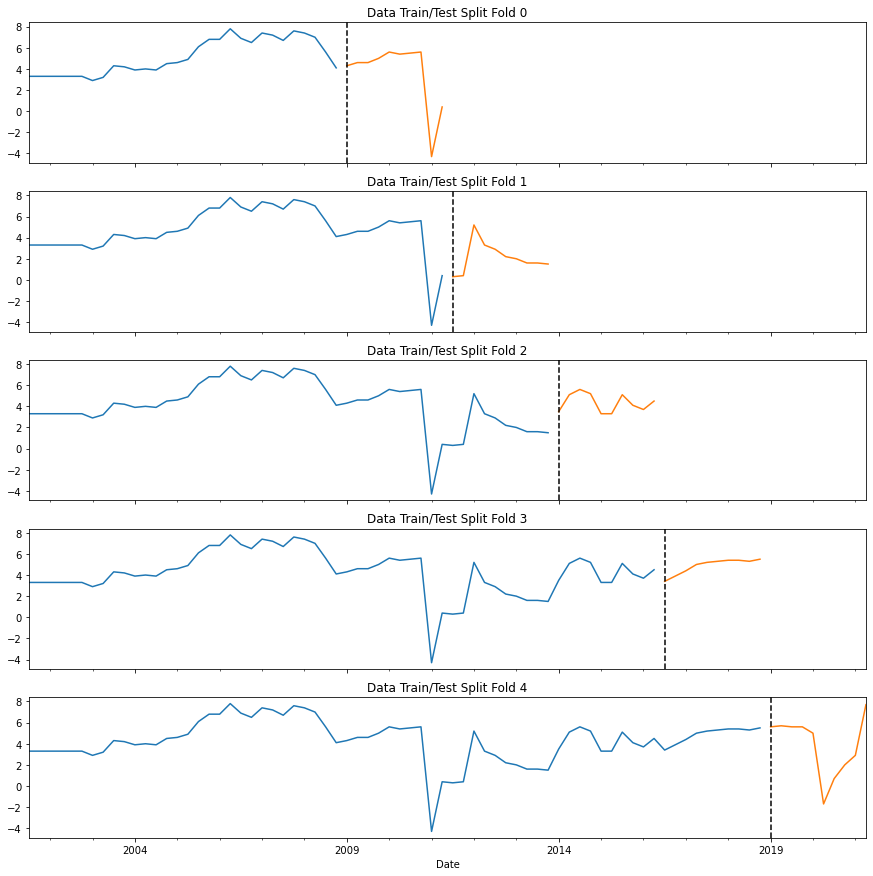

In [270]:
tss = TimeSeriesSplit(n_splits=5,test_size=10,gap=0)
#color_pal = sns.color_palette()
#plt.style.use('fivethirtyeight')
fig, axs = plt.subplots(5, 1, figsize=(15, 15), sharex=True)

fold = 0
for train_idx, val_idx in tss.split(data_lagged):
    train = data_lagged.iloc[train_idx]
    test = data_lagged.iloc[val_idx]
    train['GDP Growth Rate ( annual) (%)'].plot(ax=axs[fold],
                          label='Training Set',
                          title=f'Data Train/Test Split Fold {fold}')
    test['GDP Growth Rate ( annual) (%)'].plot(ax=axs[fold],
                         label='Test Set')
    axs[fold].axvline(test.index.min(), color='black', ls='--')
    fold += 1
plt.show()

In [271]:
data_lagged = data_lagged.sort_index()
fold = 0
preds = []
scores = []
for train_idx, val_idx in tss.split(data_lagged):
    train = data_lagged.iloc[train_idx]
    test = data_lagged.iloc[val_idx]

    #train = create_features(train)
    #test = create_features(test)

    FEATURES=data_lagged.columns.drop('GDP Growth Rate ( annual) (%)')
    TARGET='GDP Growth Rate ( annual) (%)'
    
    X_train = train[FEATURES]
    y_train = train[TARGET]

    X_test = test[FEATURES]
    y_test = test[TARGET]

    reg=xgb.XGBRegressor(base_score=0.5, booster='gbtree',    
                           n_estimators=1000,
                           early_stopping_rounds=50,
                           objective='reg:linear',
                           max_depth=3,
                           learning_rate=0.01)
    reg.fit(X_train, y_train,
            eval_set=[(X_train, y_train), (X_test, y_test)],
            verbose=1)

    y_pred = reg.predict(X_test)
    preds.append(y_pred)
    score = np.sqrt(mean_squared_error(y_test, y_pred))
    scores.append(score)

[11:48:19] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:4.87741	validation_1-rmse:4.35859
[1]	validation_0-rmse:4.83275	validation_1-rmse:4.33136
[2]	validation_0-rmse:4.78852	validation_1-rmse:4.30454
[3]	validation_0-rmse:4.74471	validation_1-rmse:4.27812
[4]	validation_0-rmse:4.70132	validation_1-rmse:4.25209
[5]	validation_0-rmse:4.65834	validation_1-rmse:4.22646
[6]	validation_0-rmse:4.61577	validation_1-rmse:4.20122
[7]	validation_0-rmse:4.57362	validation_1-rmse:4.17636
[8]	validation_0-rmse:4.53186	validation_1-rmse:4.15189
[9]	validation_0-rmse:4.49051	validation_1-rmse:4.12779
[10]	validation_0-rmse:4.44955	validation_1-rmse:4.10407
[11]	validation_0-rmse:4.40898	validation_1-rmse:4.06908
[12]	validation_0-rmse:4.36879	validation_1-rmse:4.04616
[13]	validation_0-rmse:4.32898	validation_1-rmse:4.01237
[14]	validation_0-rmse:4.28954	vali

In [272]:
print(f'sqr Mean Score across folds {np.mean(scores):0.5f}')
print(f'Fold scores:{scores}')

sqr Mean Score across folds 2.16320
Fold scores:[2.9740245403437413, 2.1230581632113514, 2.584575755884846, 0.6303848461483322, 2.5039484852256813]


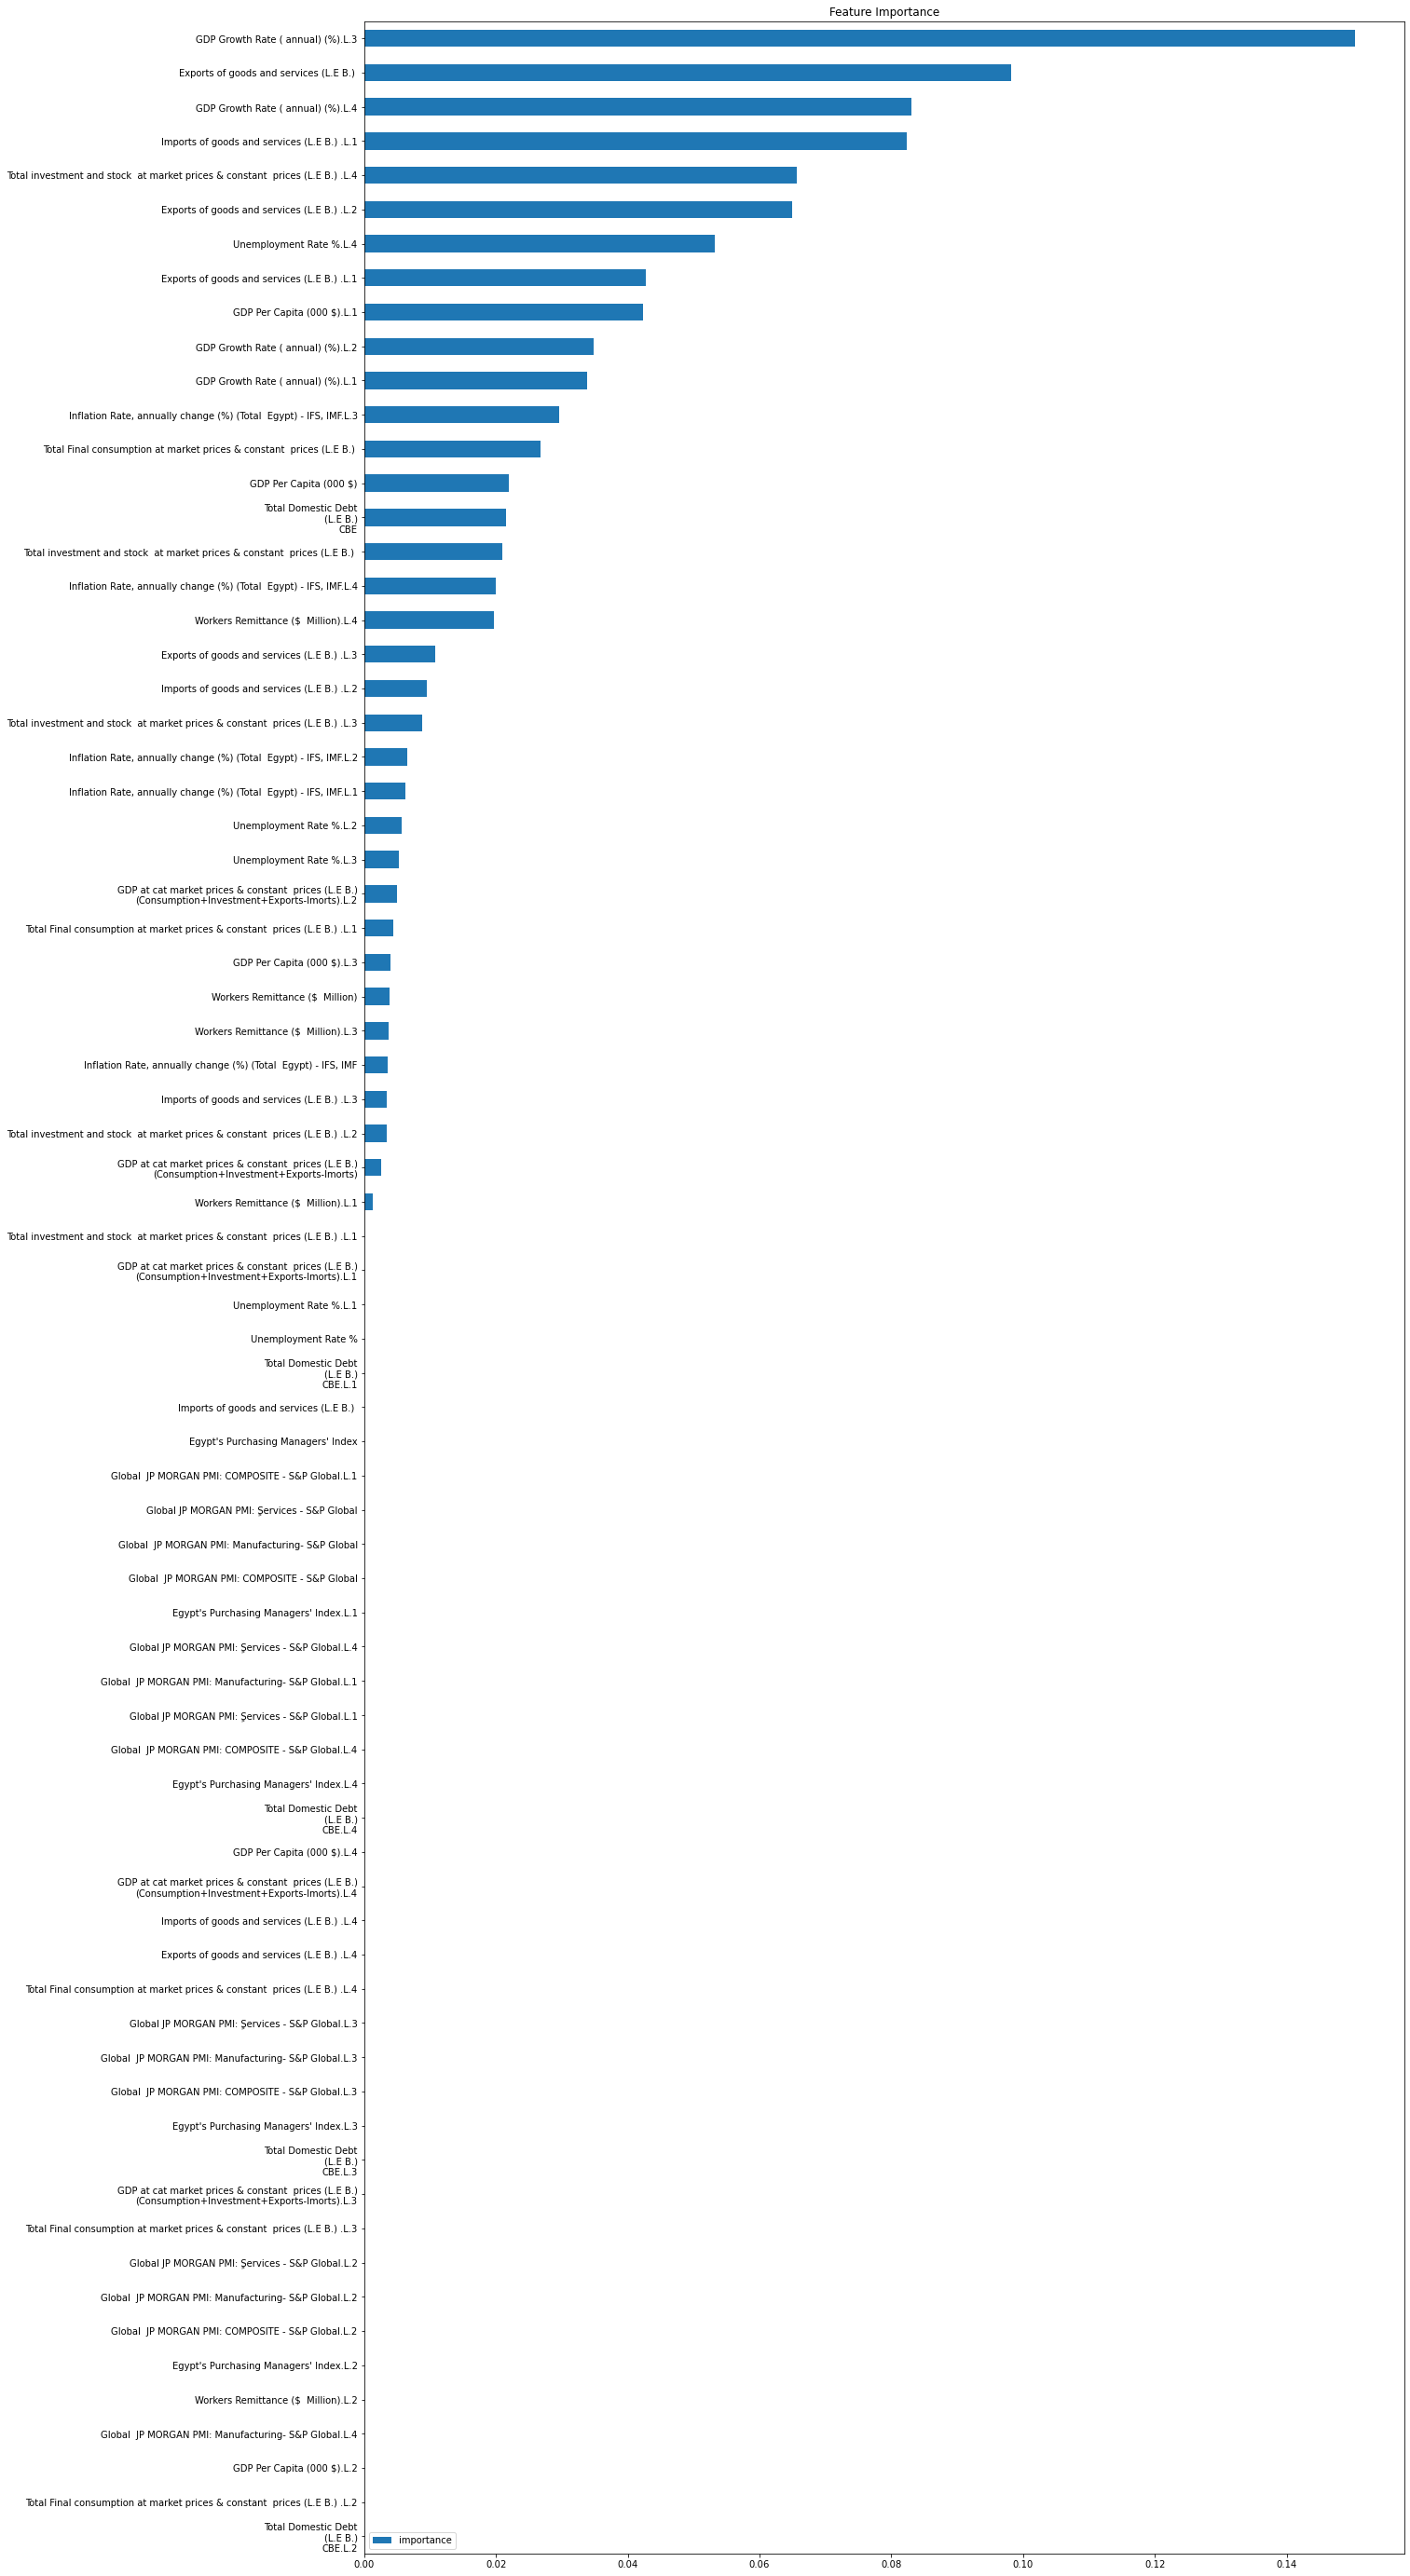

In [273]:
fi = pd.DataFrame(data=reg.feature_importances_,
             index=reg.feature_names_in_,
             columns=['importance'])
fi.sort_values('importance').plot(kind='barh', title='Feature Importance',figsize=(20,50))
plt.show()

# Data Splitting

In [274]:
train_size = int(len(data_lagged) * 0.8)
test_size = len(data_lagged)- train_size
train=data_lagged[0:train_size]
test=data_lagged[train_size:len(data_lagged)]
train.shape,test.shape

((64, 75), (16, 75))

- Another splitting by date

In [275]:
#train = data.loc[data.index < '2021-6-30']
#test = data.loc[data.index >= '2021-6-30']

In [276]:
#train.dropna(inplace=True)
#train

In [277]:
#scaler=MinMaxScaler()
#train[train.columns]=scaler.fit_transform(train[train.columns])
#test[test.columns]=scaler.fit_transform(test[test.columns])

In [278]:
len(test) , len(train)

(16, 64)

In [279]:
FEATURES = data_lagged.columns.drop('GDP Growth Rate ( annual) (%)')
TARGET='GDP Growth Rate ( annual) (%)'
X_train=train[FEATURES]
y_train = train[TARGET]
X_test = test[FEATURES]
y_test = test[TARGET]

In [280]:
X_test.shape,X_train.shape

((16, 74), (64, 74))

In [288]:
reg = xgb.XGBRegressor(base_score=0.5, booster='gbtree',    
                           n_estimators=1000,
                           #early_stopping_rounds=50,
                           objective='reg:linear',
                           max_depth=3,
                           learning_rate=0.01,n_jobs=-1)
reg.fit(X_train, y_train,
            eval_set=[(X_train, y_train), (X_test, y_test)],
            verbose=1)

[11:51:27] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:4.24377	validation_1-rmse:4.51157
[1]	validation_0-rmse:4.20614	validation_1-rmse:4.47358
[2]	validation_0-rmse:4.16890	validation_1-rmse:4.43602
[3]	validation_0-rmse:4.13204	validation_1-rmse:4.39889
[4]	validation_0-rmse:4.09538	validation_1-rmse:4.36695
[5]	validation_0-rmse:4.05908	validation_1-rmse:4.33548
[6]	validation_0-rmse:4.02332	validation_1-rmse:4.29960
[7]	validation_0-rmse:3.98775	validation_1-rmse:4.26897
[8]	validation_0-rmse:3.95254	validation_1-rmse:4.23881
[9]	validation_0-rmse:3.91769	validation_1-rmse:4.20910
[10]	validation_0-rmse:3.88320	validation_1-rmse:4.17986
[11]	validation_0-rmse:3.84915	validation_1-rmse:4.15424
[12]	validation_0-rmse:3.81543	validation_1-rmse:4.12889
[13]	validation_0-rmse:3.78204	validation_1-rmse:4.09300
[14]	validation_0-rmse:3.74888	vali

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.01, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=3, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=1000,
             n_jobs=-1, num_parallel_tree=1, objective='reg:linear',
             predictor='auto', random_state=0, reg_alpha=0, ...)

In [282]:
y_pred=reg.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

2.1076624435400566

In [283]:
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(y_test, y_pred)*100

43.64891397951389

In [292]:
test['y_pred']=reg.predict(X_test)
test[['y_pred','GDP Growth Rate ( annual) (%)']]

,y_pred,GDP Growth Rate ( annual) (%)
Date,,
2017-09-30,5.203973,5.2
2017-12-31,5.311853,5.3
2018-03-31,5.416152,5.4
2018-06-30,5.443815,5.4
2018-09-30,5.344909,5.3
2018-12-31,5.522580,5.5
2019-03-31,5.569895,5.6
2019-06-30,5.661127,5.7
2019-09-30,5.609753,5.6


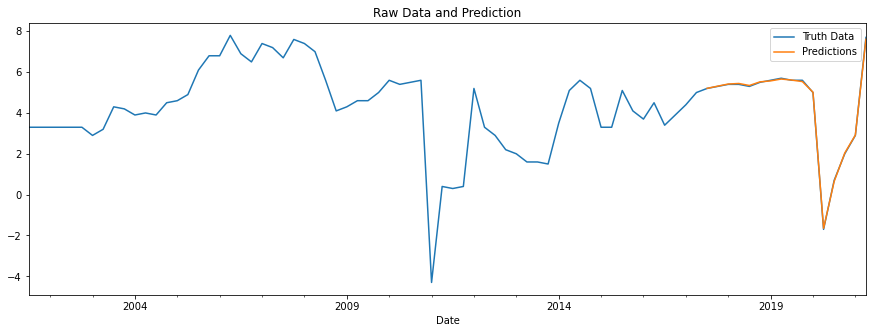

In [293]:
ax = data_lagged[['GDP Growth Rate ( annual) (%)']].plot(style='-',figsize=(15, 5))
test['y_pred'].plot(ax=ax, style='-')
plt.legend(['Truth Data', 'Predictions'])
ax.set_title('Raw Data and Prediction')
plt.show()

# Train on all data

In [294]:
#all data
FEATURES=data_lagged.columns.drop('GDP Growth Rate ( annual) (%)')
TARGET='GDP Growth Rate ( annual) (%)'
X_train=data_lagged[FEATURES]
y_train = data_lagged[TARGET]
X_train

reg = xgb.XGBRegressor(base_score=0.5, booster='gbtree',    
                           n_estimators=1000,
                           #early_stopping_rounds=50,
                           objective='reg:linear',
                           max_depth=3,
                           learning_rate=0.01,n_jobs=-1)
reg.fit(X_train, y_train,
            #eval_set=[(X_train, y_train), (X_test, y_test)],
            verbose=1)

[11:53:28] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.01, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=3, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=1000,
             n_jobs=-1, num_parallel_tree=1, objective='reg:linear',
             predictor='auto', random_state=0, reg_alpha=0, ...)

# Forecast with base case 
- Assuming now change in independent variables and forecast one step

In [295]:
df.index.max()

Timestamp('2021-06-30 00:00:00')

In [296]:
df

,Total Final consumption at market prices & constant prices (L.E B.),Total investment and stock at market prices & constant prices (L.E B.),Exports of goods and services (L.E B.),Imports of goods and services (L.E B.),GDP at cat market prices & constant prices (L.E B.)\n(Consumption+Investment+Exports-Imorts),GDP Per Capita (000 $),"Inflation Rate, annually change (%) (Total Egypt) - IFS, IMF",Total Domestic Debt\n(L.E B.)\nCBE,Workers Remittance ($ Million),Unemployment Rate %,GDP Growth Rate ( annual) (%),Egypt's Purchasing Managers' Index,Global JP MORGAN PMI: COMPOSITE - S&P Global,Global JP MORGAN PMI: Manufacturing- S&P Global,Global JP MORGAN PMI: ٍServices - S&P Global
Date,,,,,,,,,,,,,,,
2001-09-30,387.63,71.64,76.91,97.57,438.61,8816.328570,2.165570,295.053,759.2,9.96,3.3,47.400000,54.1,53.7,54.1
2001-12-31,401.86,76.87,78.82,103.14,454.41,8816.328570,2.320502,297.549,783.7,9.96,3.3,47.400000,54.1,53.7,54.1
2002-03-31,421.28,79.87,91.36,105.97,486.53,8816.328570,2.603037,305.646,655.2,9.96,3.3,47.400000,54.1,53.7,54.1
2002-06-30,382.49,105.10,91.96,112.17,467.38,8816.328570,2.644360,329.800,754.4,9.96,3.3,47.400000,54.1,53.7,54.1
2002-09-30,407.09,68.82,91.62,114.42,453.11,8816.328570,2.736786,343.555,738.4,9.96,3.3,47.400000,54.1,53.7,54.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-30,1018.60,82.60,85.10,196.30,990.00,9850.746269,5.400240,4742.107,7869.0,9.60,-1.7,38.333333,36.8,43.3,35.6
2020-09-30,957.60,93.20,97.80,166.00,982.60,9738.354807,3.753137,4742.107,8028.1,7.30,0.7,49.800000,52.0,51.6,51.6
2020-12-31,977.40,119.80,106.40,179.00,1024.60,10114.511352,5.213860,4742.107,7493.3,7.20,2.0,50.166667,53.0,53.6,52.3


In [325]:
future = pd.date_range('2021-9-30','2022-6-30',freq='Q')
future_df = pd.DataFrame(index=future)
#future_df['isFuture'] = True
#df['isFuture']=False
df_and_future=pd.concat([df,future_df])
df_and_future

,Total Final consumption at market prices & constant prices (L.E B.),Total investment and stock at market prices & constant prices (L.E B.),Exports of goods and services (L.E B.),Imports of goods and services (L.E B.),GDP at cat market prices & constant prices (L.E B.)\n(Consumption+Investment+Exports-Imorts),GDP Per Capita (000 $),"Inflation Rate, annually change (%) (Total Egypt) - IFS, IMF",Total Domestic Debt\n(L.E B.)\nCBE,Workers Remittance ($ Million),Unemployment Rate %,GDP Growth Rate ( annual) (%),Egypt's Purchasing Managers' Index,Global JP MORGAN PMI: COMPOSITE - S&P Global,Global JP MORGAN PMI: Manufacturing- S&P Global,Global JP MORGAN PMI: ٍServices - S&P Global
2001-09-30,387.63,71.64,76.91,97.57,438.61,8816.328570,2.165570,295.053,759.2,9.96,3.3,47.400000,54.1,53.7,54.1
2001-12-31,401.86,76.87,78.82,103.14,454.41,8816.328570,2.320502,297.549,783.7,9.96,3.3,47.400000,54.1,53.7,54.1
2002-03-31,421.28,79.87,91.36,105.97,486.53,8816.328570,2.603037,305.646,655.2,9.96,3.3,47.400000,54.1,53.7,54.1
2002-06-30,382.49,105.10,91.96,112.17,467.38,8816.328570,2.644360,329.800,754.4,9.96,3.3,47.400000,54.1,53.7,54.1
2002-09-30,407.09,68.82,91.62,114.42,453.11,8816.328570,2.736786,343.555,738.4,9.96,3.3,47.400000,54.1,53.7,54.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-30,1033.50,162.20,130.80,260.20,1066.30,10464.180569,4.640609,4742.107,7849.6,7.30,7.7,48.733333,57.2,55.8,58.0
2021-09-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [326]:
#cols= df_and_future.columns.drop('GDP Growth Rate ( annual) (%)')
# assuming all varibalise is constant in next quarter
#df_and_future.loc[:,cols] = df_and_future.loc[:,cols].ffill(axis=0)
#df_and_future
df_and_future=df_and_future.ffill(axis=0)
df_and_future

,Total Final consumption at market prices & constant prices (L.E B.),Total investment and stock at market prices & constant prices (L.E B.),Exports of goods and services (L.E B.),Imports of goods and services (L.E B.),GDP at cat market prices & constant prices (L.E B.)\n(Consumption+Investment+Exports-Imorts),GDP Per Capita (000 $),"Inflation Rate, annually change (%) (Total Egypt) - IFS, IMF",Total Domestic Debt\n(L.E B.)\nCBE,Workers Remittance ($ Million),Unemployment Rate %,GDP Growth Rate ( annual) (%),Egypt's Purchasing Managers' Index,Global JP MORGAN PMI: COMPOSITE - S&P Global,Global JP MORGAN PMI: Manufacturing- S&P Global,Global JP MORGAN PMI: ٍServices - S&P Global
2001-09-30,387.63,71.64,76.91,97.57,438.61,8816.328570,2.165570,295.053,759.2,9.96,3.3,47.400000,54.1,53.7,54.1
2001-12-31,401.86,76.87,78.82,103.14,454.41,8816.328570,2.320502,297.549,783.7,9.96,3.3,47.400000,54.1,53.7,54.1
2002-03-31,421.28,79.87,91.36,105.97,486.53,8816.328570,2.603037,305.646,655.2,9.96,3.3,47.400000,54.1,53.7,54.1
2002-06-30,382.49,105.10,91.96,112.17,467.38,8816.328570,2.644360,329.800,754.4,9.96,3.3,47.400000,54.1,53.7,54.1
2002-09-30,407.09,68.82,91.62,114.42,453.11,8816.328570,2.736786,343.555,738.4,9.96,3.3,47.400000,54.1,53.7,54.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-30,1033.50,162.20,130.80,260.20,1066.30,10464.180569,4.640609,4742.107,7849.6,7.30,7.7,48.733333,57.2,55.8,58.0
2021-09-30,1033.50,162.20,130.80,260.20,1066.30,10464.180569,4.640609,4742.107,7849.6,7.30,7.7,48.733333,57.2,55.8,58.0
2021-12-31,1033.50,162.20,130.80,260.20,1066.30,10464.180569,4.640609,4742.107,7849.6,7.30,7.7,48.733333,57.2,55.8,58.0
2022-03-31,1033.50,162.20,130.80,260.20,1066.30,10464.180569,4.640609,4742.107,7849.6,7.30,7.7,48.733333,57.2,55.8,58.0


In [327]:
#df_and_future = create_features(df_and_future)
#df_and_future = add_lags(df_and_future)
#future=series_to_supervised(df_and_future,4,1)

future=lagmat(df_and_future,maxlag=4,use_pandas=True,original='in',trim='forward')
future
#from statsmodels.tsa.tsatools import lagmat
#data_lagged = lagmat(df,maxlag=4,use_pandas=True,original='in',trim='forward')
future[['Total Domestic Debt\n(L.E B.)\nCBE','Total Domestic Debt\n(L.E B.)\nCBE.L.1',\
             'Total Domestic Debt\n(L.E B.)\nCBE.L.2',\
            'Total Domestic Debt\n(L.E B.)\nCBE.L.3',\
            'Total Domestic Debt\n(L.E B.)\nCBE.L.4']]
#\,'Total Final consumption at market prices & constant prices (L.E B.).L.1']]
#data_lagged
future

,Total Final consumption at market prices & constant prices (L.E B.),Total investment and stock at market prices & constant prices (L.E B.),Exports of goods and services (L.E B.),Imports of goods and services (L.E B.),GDP at cat market prices & constant prices (L.E B.)\n(Consumption+Investment+Exports-Imorts),GDP Per Capita (000 $),"Inflation Rate, annually change (%) (Total Egypt) - IFS, IMF",Total Domestic Debt\n(L.E B.)\nCBE,Workers Remittance ($ Million),Unemployment Rate %,GDP Growth Rate ( annual) (%),Egypt's Purchasing Managers' Index,Global JP MORGAN PMI: COMPOSITE - S&P Global,Global JP MORGAN PMI: Manufacturing- S&P Global,Global JP MORGAN PMI: ٍServices - S&P Global,Total Final consumption at market prices & constant prices (L.E B.) .L.1,Total investment and stock at market prices & constant prices (L.E B.) .L.1,Exports of goods and services (L.E B.) .L.1,Imports of goods and services (L.E B.) .L.1,GDP at cat market prices & constant prices (L.E B.)\n(Consumption+Investment+Exports-Imorts).L.1,GDP Per Capita (000 $).L.1,"Inflation Rate, annually change (%) (Total Egypt) - IFS, IMF.L.1",Total Domestic Debt\n(L.E B.)\nCBE.L.1,Workers Remittance ($ Million).L.1,Unemployment Rate %.L.1,GDP Growth Rate ( annual) (%).L.1,Egypt's Purchasing Managers' Index.L.1,Global JP MORGAN PMI: COMPOSITE - S&P Global.L.1,Global JP MORGAN PMI: Manufacturing- S&P Global.L.1,Global JP MORGAN PMI: ٍServices - S&P Global.L.1,Total Final consumption at market prices & constant prices (L.E B.) .L.2,Total investment and stock at market prices & constant prices (L.E B.) .L.2,Exports of goods and services (L.E B.) .L.2,Imports of goods and services (L.E B.) .L.2,GDP at cat market prices & constant prices (L.E B.)\n(Consumption+Investment+Exports-Imorts).L.2,GDP Per Capita (000 $).L.2,"Inflation Rate, annually change (%) (Total Egypt) - IFS, IMF.L.2",Total Domestic Debt\n(L.E B.)\nCBE.L.2,Workers Remittance ($ Million).L.2,Unemployment Rate %.L.2,GDP Growth Rate ( annual) (%).L.2,Egypt's Purchasing Managers' Index.L.2,Global JP MORGAN PMI: COMPOSITE - S&P Global.L.2,Global JP MORGAN PMI: Manufacturing- S&P Global.L.2,Global JP MORGAN PMI: ٍServices - S&P Global.L.2,Total Final consumption at market prices & constant prices (L.E B.) .L.3,Total investment and stock at market prices & constant prices (L.E B.) .L.3,Exports of goods and services (L.E B.) .L.3,Imports of goods and services (L.E B.) .L.3,GDP at cat market prices & constant prices (L.E B.)\n(Consumption+Investment+Exports-Imorts).L.3,GDP Per Capita (000 $).L.3,"Inflation Rate, annually change (%) (Total Egypt) - IFS, IMF.L.3",Total Domestic Debt\n(L.E B.)\nCBE.L.3,Workers Remittance ($ Million).L.3,Unemployment Rate %.L.3,GDP Growth Rate ( annual) (%).L.3,Egypt's Purchasing Managers' Index.L.3,Global JP MORGAN PMI: COMPOSITE - S&P Global.L.3,Global JP MORGAN PMI: Manufacturing- S&P Global.L.3,Global JP MORGAN PMI: ٍServices - S&P Global.L.3,Total Final consumption at market prices & constant prices (L.E B.) .L.4,Total investment and stock at market prices & constant prices (L.E B.) .L.4,Exports of goods and services (L.E B.) .L.4,Imports of goods and services (L.E B.) .L.4,GDP at cat market prices & constant prices (L.E B.)\n(Consumption+Investment+Exports-Imorts).L.4,GDP Per Capita (000 $).L.4,"Inflation Rate, annually change (%) (Total Egypt) - IFS, IMF.L.4",Total Domestic Debt\n(L.E B.)\nCBE.L.4,Workers Remittance ($ Million).L.4,Unemployment Rate %.L.4,GDP Growth Rate ( annual) (%).L.4,Egypt's Purchasing Managers' Index.L.4,Global JP MORGAN PMI: COMPOSITE - S&P Global.L.4,Global JP MORGAN PMI: Manufacturing- S&P Global.L.4,Global JP MORGAN PMI: ٍServices - S&P Global.L.4
2001-09-30,387.63,71.64,76.91,97.57,438.61,8816.328570,2.165570,295.053,759.2,9.96,3.3,47.400000,54.1,53.7,54.1,0.00,0.00,0.00,0.00,0.00,0.000000,0.000000,0.000,0.0,0.00,0.0,0.000000,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.000000,0.000000,0.000,0.0,0.00,0.0,0.000000,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.000000,0.0000

In [328]:
future_w_features=future.loc['2021-9-30':'2022-6-30'] 
future_w_features.shape

(4, 75)

In [329]:
future_w_features[FEATURES]

,Total Final consumption at market prices & constant prices (L.E B.),Total investment and stock at market prices & constant prices (L.E B.),Exports of goods and services (L.E B.),Imports of goods and services (L.E B.),GDP at cat market prices & constant prices (L.E B.)\n(Consumption+Investment+Exports-Imorts),GDP Per Capita (000 $),"Inflation Rate, annually change (%) (Total Egypt) - IFS, IMF",Total Domestic Debt\n(L.E B.)\nCBE,Workers Remittance ($ Million),Unemployment Rate %,Egypt's Purchasing Managers' Index,Global JP MORGAN PMI: COMPOSITE - S&P Global,Global JP MORGAN PMI: Manufacturing- S&P Global,Global JP MORGAN PMI: ٍServices - S&P Global,Total Final consumption at market prices & constant prices (L.E B.) .L.1,Total investment and stock at market prices & constant prices (L.E B.) .L.1,Exports of goods and services (L.E B.) .L.1,Imports of goods and services (L.E B.) .L.1,GDP at cat market prices & constant prices (L.E B.)\n(Consumption+Investment+Exports-Imorts).L.1,GDP Per Capita (000 $).L.1,"Inflation Rate, annually change (%) (Total Egypt) - IFS, IMF.L.1",Total Domestic Debt\n(L.E B.)\nCBE.L.1,Workers Remittance ($ Million).L.1,Unemployment Rate %.L.1,GDP Growth Rate ( annual) (%).L.1,Egypt's Purchasing Managers' Index.L.1,Global JP MORGAN PMI: COMPOSITE - S&P Global.L.1,Global JP MORGAN PMI: Manufacturing- S&P Global.L.1,Global JP MORGAN PMI: ٍServices - S&P Global.L.1,Total Final consumption at market prices & constant prices (L.E B.) .L.2,Total investment and stock at market prices & constant prices (L.E B.) .L.2,Exports of goods and services (L.E B.) .L.2,Imports of goods and services (L.E B.) .L.2,GDP at cat market prices & constant prices (L.E B.)\n(Consumption+Investment+Exports-Imorts).L.2,GDP Per Capita (000 $).L.2,"Inflation Rate, annually change (%) (Total Egypt) - IFS, IMF.L.2",Total Domestic Debt\n(L.E B.)\nCBE.L.2,Workers Remittance ($ Million).L.2,Unemployment Rate %.L.2,GDP Growth Rate ( annual) (%).L.2,Egypt's Purchasing Managers' Index.L.2,Global JP MORGAN PMI: COMPOSITE - S&P Global.L.2,Global JP MORGAN PMI: Manufacturing- S&P Global.L.2,Global JP MORGAN PMI: ٍServices - S&P Global.L.2,Total Final consumption at market prices & constant prices (L.E B.) .L.3,Total investment and stock at market prices & constant prices (L.E B.) .L.3,Exports of goods and services (L.E B.) .L.3,Imports of goods and services (L.E B.) .L.3,GDP at cat market prices & constant prices (L.E B.)\n(Consumption+Investment+Exports-Imorts).L.3,GDP Per Capita (000 $).L.3,"Inflation Rate, annually change (%) (Total Egypt) - IFS, IMF.L.3",Total Domestic Debt\n(L.E B.)\nCBE.L.3,Workers Remittance ($ Million).L.3,Unemployment Rate %.L.3,GDP Growth Rate ( annual) (%).L.3,Egypt's Purchasing Managers' Index.L.3,Global JP MORGAN PMI: COMPOSITE - S&P Global.L.3,Global JP MORGAN PMI: Manufacturing- S&P Global.L.3,Global JP MORGAN PMI: ٍServices - S&P Global.L.3,Total Final consumption at market prices & constant prices (L.E B.) .L.4,Total investment and stock at market prices & constant prices (L.E B.) .L.4,Exports of goods and services (L.E B.) .L.4,Imports of goods and services (L.E B.) .L.4,GDP at cat market prices & constant prices (L.E B.)\n(Consumption+Investment+Exports-Imorts).L.4,GDP Per Capita (000 $).L.4,"Inflation Rate, annually change (%) (Total Egypt) - IFS, IMF.L.4",Total Domestic Debt\n(L.E B.)\nCBE.L.4,Workers Remittance ($ Million).L.4,Unemployment Rate %.L.4,GDP Growth Rate ( annual) (%).L.4,Egypt's Purchasing Managers' Index.L.4,Global JP MORGAN PMI: COMPOSITE - S&P Global.L.4,Global JP MORGAN PMI: Manufacturing- S&P Global.L.4,Global JP MORGAN PMI: ٍServices - S&P Global.L.4
2021-09-30,1033.5,162.2,130.8,260.2,1066.3,10464.180569,4.640609,4742.107,7849.6,7.3,48.733333,57.2,55.8,58.0,1033.5,162.2,130.8,260.2,1066.3,10464.180569,4.640609,4742.107,7849.6,7.3,7.7,48.733333,57.2,55.8,58.0,1013.6,133.1,146.1,238.2,1054.6,10379.921260,4.401757,4742.107,7849.6,7.4,2.9,48.666667,53.4,54.2,53.0,977.4,119.8,106.4,179.0,1024.6,1

In [330]:
future_w_features['pred']=reg.predict(future_w_features[FEATURES])
future_w_features

,Total Final consumption at market prices & constant prices (L.E B.),Total investment and stock at market prices & constant prices (L.E B.),Exports of goods and services (L.E B.),Imports of goods and services (L.E B.),GDP at cat market prices & constant prices (L.E B.)\n(Consumption+Investment+Exports-Imorts),GDP Per Capita (000 $),"Inflation Rate, annually change (%) (Total Egypt) - IFS, IMF",Total Domestic Debt\n(L.E B.)\nCBE,Workers Remittance ($ Million),Unemployment Rate %,GDP Growth Rate ( annual) (%),Egypt's Purchasing Managers' Index,Global JP MORGAN PMI: COMPOSITE - S&P Global,Global JP MORGAN PMI: Manufacturing- S&P Global,Global JP MORGAN PMI: ٍServices - S&P Global,Total Final consumption at market prices & constant prices (L.E B.) .L.1,Total investment and stock at market prices & constant prices (L.E B.) .L.1,Exports of goods and services (L.E B.) .L.1,Imports of goods and services (L.E B.) .L.1,GDP at cat market prices & constant prices (L.E B.)\n(Consumption+Investment+Exports-Imorts).L.1,GDP Per Capita (000 $).L.1,"Inflation Rate, annually change (%) (Total Egypt) - IFS, IMF.L.1",Total Domestic Debt\n(L.E B.)\nCBE.L.1,Workers Remittance ($ Million).L.1,Unemployment Rate %.L.1,GDP Growth Rate ( annual) (%).L.1,Egypt's Purchasing Managers' Index.L.1,Global JP MORGAN PMI: COMPOSITE - S&P Global.L.1,Global JP MORGAN PMI: Manufacturing- S&P Global.L.1,Global JP MORGAN PMI: ٍServices - S&P Global.L.1,Total Final consumption at market prices & constant prices (L.E B.) .L.2,Total investment and stock at market prices & constant prices (L.E B.) .L.2,Exports of goods and services (L.E B.) .L.2,Imports of goods and services (L.E B.) .L.2,GDP at cat market prices & constant prices (L.E B.)\n(Consumption+Investment+Exports-Imorts).L.2,GDP Per Capita (000 $).L.2,"Inflation Rate, annually change (%) (Total Egypt) - IFS, IMF.L.2",Total Domestic Debt\n(L.E B.)\nCBE.L.2,Workers Remittance ($ Million).L.2,Unemployment Rate %.L.2,GDP Growth Rate ( annual) (%).L.2,Egypt's Purchasing Managers' Index.L.2,Global JP MORGAN PMI: COMPOSITE - S&P Global.L.2,Global JP MORGAN PMI: Manufacturing- S&P Global.L.2,Global JP MORGAN PMI: ٍServices - S&P Global.L.2,Total Final consumption at market prices & constant prices (L.E B.) .L.3,Total investment and stock at market prices & constant prices (L.E B.) .L.3,Exports of goods and services (L.E B.) .L.3,Imports of goods and services (L.E B.) .L.3,GDP at cat market prices & constant prices (L.E B.)\n(Consumption+Investment+Exports-Imorts).L.3,GDP Per Capita (000 $).L.3,"Inflation Rate, annually change (%) (Total Egypt) - IFS, IMF.L.3",Total Domestic Debt\n(L.E B.)\nCBE.L.3,Workers Remittance ($ Million).L.3,Unemployment Rate %.L.3,GDP Growth Rate ( annual) (%).L.3,Egypt's Purchasing Managers' Index.L.3,Global JP MORGAN PMI: COMPOSITE - S&P Global.L.3,Global JP MORGAN PMI: Manufacturing- S&P Global.L.3,Global JP MORGAN PMI: ٍServices - S&P Global.L.3,Total Final consumption at market prices & constant prices (L.E B.) .L.4,Total investment and stock at market prices & constant prices (L.E B.) .L.4,Exports of goods and services (L.E B.) .L.4,Imports of goods and services (L.E B.) .L.4,GDP at cat market prices & constant prices (L.E B.)\n(Consumption+Investment+Exports-Imorts).L.4,GDP Per Capita (000 $).L.4,"Inflation Rate, annually change (%) (Total Egypt) - IFS, IMF.L.4",Total Domestic Debt\n(L.E B.)\nCBE.L.4,Workers Remittance ($ Million).L.4,Unemployment Rate %.L.4,GDP Growth Rate ( annual) (%).L.4,Egypt's Purchasing Managers' Index.L.4,Global JP MORGAN PMI: COMPOSITE - S&P Global.L.4,Global JP MORGAN PMI: Manufacturing- S&P Global.L.4,Global JP MORGAN PMI: ٍServices - S&P Global.L.4,pred
2021-09-30,1033.5,162.2,130.8,260.2,1066.3,10464.180569,4.640609,4742.107,7849.6,7.3,7.7,48.733333,57.2,55.8,58.0,1033.5,162.2,130.8,260.2,1066.3,10464.180569,4.640609,4742.107,7849.6,7.3,7.7,48.733333,57.2,55.8,58.0,1013.6,133.1,146.1,238.2,1054.6,10379.921260,4.401757,4742.107,7849.6,7.4,2.9,48.666667,53.4,54.

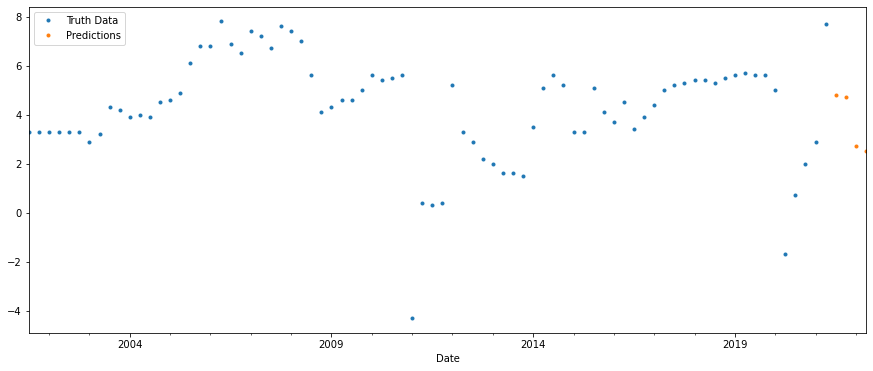

In [331]:
df['GDP Growth Rate ( annual) (%)'].plot(style='.',figsize=(15,6))
future_w_features['pred'].plot(style='.')
plt.legend(['Truth Data', 'Predictions'])
ax.set_title('Raw Data and Prediction')
plt.show()

# Forecast with Rolling Mean 

In [334]:
future1=pd.date_range('2021-9-30','2022-6-30',freq='Q')
future_df1= pd.DataFrame(index=future1)
df_and_future1=pd.concat([df,future_df1])
df_and_future1

,Total Final consumption at market prices & constant prices (L.E B.),Total investment and stock at market prices & constant prices (L.E B.),Exports of goods and services (L.E B.),Imports of goods and services (L.E B.),GDP at cat market prices & constant prices (L.E B.)\n(Consumption+Investment+Exports-Imorts),GDP Per Capita (000 $),"Inflation Rate, annually change (%) (Total Egypt) - IFS, IMF",Total Domestic Debt\n(L.E B.)\nCBE,Workers Remittance ($ Million),Unemployment Rate %,GDP Growth Rate ( annual) (%),Egypt's Purchasing Managers' Index,Global JP MORGAN PMI: COMPOSITE - S&P Global,Global JP MORGAN PMI: Manufacturing- S&P Global,Global JP MORGAN PMI: ٍServices - S&P Global
2001-09-30,387.63,71.64,76.91,97.57,438.61,8816.328570,2.165570,295.053,759.2,9.96,3.3,47.400000,54.1,53.7,54.1
2001-12-31,401.86,76.87,78.82,103.14,454.41,8816.328570,2.320502,297.549,783.7,9.96,3.3,47.400000,54.1,53.7,54.1
2002-03-31,421.28,79.87,91.36,105.97,486.53,8816.328570,2.603037,305.646,655.2,9.96,3.3,47.400000,54.1,53.7,54.1
2002-06-30,382.49,105.10,91.96,112.17,467.38,8816.328570,2.644360,329.800,754.4,9.96,3.3,47.400000,54.1,53.7,54.1
2002-09-30,407.09,68.82,91.62,114.42,453.11,8816.328570,2.736786,343.555,738.4,9.96,3.3,47.400000,54.1,53.7,54.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-30,1033.50,162.20,130.80,260.20,1066.30,10464.180569,4.640609,4742.107,7849.6,7.30,7.7,48.733333,57.2,55.8,58.0
2021-09-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [459]:
df_rolling_future=df_and_future1.interpolate('index').rolling(4).mean()
df_rolling_future

,Total Final consumption at market prices & constant prices (L.E B.),Total investment and stock at market prices & constant prices (L.E B.),Exports of goods and services (L.E B.),Imports of goods and services (L.E B.),GDP at cat market prices & constant prices (L.E B.)\n(Consumption+Investment+Exports-Imorts),GDP Per Capita (000 $),"Inflation Rate, annually change (%) (Total Egypt) - IFS, IMF",Total Domestic Debt\n(L.E B.)\nCBE,Workers Remittance ($ Million),Unemployment Rate %,GDP Growth Rate ( annual) (%),Egypt's Purchasing Managers' Index,Global JP MORGAN PMI: COMPOSITE - S&P Global,Global JP MORGAN PMI: Manufacturing- S&P Global,Global JP MORGAN PMI: ٍServices - S&P Global
2001-09-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2002-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2002-06-30,398.315,83.370,84.7625,104.7125,461.7325,8816.328570,2.433367,307.0120,738.125,9.960,3.300,47.400000,54.10,53.70,54.100
2002-09-30,403.180,82.665,88.4400,108.9250,465.3575,8816.328570,2.576171,319.1375,732.925,9.960,3.300,47.400000,54.10,53.70,54.100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-30,995.525,127.075,120.2750,210.8500,1032.0250,10174.241997,4.502341,4742.1070,7805.150,7.300,3.325,49.341667,53.90,53.80,53.725
2021-09-30,1014.500,144.325,128.5250,234.4000,1052.9500,10355.698438,4.724209,4742.1070,7760.525,7.300,5.075,49.075000,55.20,54.85,55.325
2021-12-31,1028.525,154.925,134.6250,254.7000,1063.3750,10443.115742,4.580896,4742.1070,7849.600,7.325,6.500,48.716667,56.25,55.40,56.750
2022-03-31,1033.500,162.200,130.8000,260.2000,1066.3000,10464.180569,4.640609,4742.1070,7849.600,7.300,7.700,48.733333,57.20,55.80,58.000


In [385]:
#future_df = pd.DataFrame(index=future)
#future_df['isFuture'] = True
#df['isFuture']=False
#df_and_future1=pd.concat([df,future_df])
#df_and_future = create_features(df_and_future)
#df_and_future = add_lags(df_and_future)
#future=series_to_supervised(df_and_future,4,1)

lagged_future=lagmat(df_rolling_future,maxlag=4,use_pandas=True,original='in',trim='forward')
lagged_future
#from statsmodels.tsa.tsatools import lagmat
#data_lagged = lagmat(df,maxlag=4,use_pandas=True,original='in',trim='forward')
#future[['Total Domestic Debt\n(L.E B.)\nCBE','Total Domestic Debt\n(L.E B.)\nCBE.L.1',\
            # 'Total Domestic Debt\n(L.E B.)\nCBE.L.2',\
            #'Total Domestic Debt\n(L.E B.)\nCBE.L.3',\
            #'Total Domestic Debt\n(L.E B.)\nCBE.L.4']]
#\,'Total Final consumption at market prices & constant prices (L.E B.).L.1']]
#data_lagged
lagged_future

,Total Final consumption at market prices & constant prices (L.E B.),Total investment and stock at market prices & constant prices (L.E B.),Exports of goods and services (L.E B.),Imports of goods and services (L.E B.),GDP at cat market prices & constant prices (L.E B.)\n(Consumption+Investment+Exports-Imorts),GDP Per Capita (000 $),"Inflation Rate, annually change (%) (Total Egypt) - IFS, IMF",Total Domestic Debt\n(L.E B.)\nCBE,Workers Remittance ($ Million),Unemployment Rate %,GDP Growth Rate ( annual) (%),Egypt's Purchasing Managers' Index,Global JP MORGAN PMI: COMPOSITE - S&P Global,Global JP MORGAN PMI: Manufacturing- S&P Global,Global JP MORGAN PMI: ٍServices - S&P Global,Total Final consumption at market prices & constant prices (L.E B.) .L.1,Total investment and stock at market prices & constant prices (L.E B.) .L.1,Exports of goods and services (L.E B.) .L.1,Imports of goods and services (L.E B.) .L.1,GDP at cat market prices & constant prices (L.E B.)\n(Consumption+Investment+Exports-Imorts).L.1,GDP Per Capita (000 $).L.1,"Inflation Rate, annually change (%) (Total Egypt) - IFS, IMF.L.1",Total Domestic Debt\n(L.E B.)\nCBE.L.1,Workers Remittance ($ Million).L.1,Unemployment Rate %.L.1,GDP Growth Rate ( annual) (%).L.1,Egypt's Purchasing Managers' Index.L.1,Global JP MORGAN PMI: COMPOSITE - S&P Global.L.1,Global JP MORGAN PMI: Manufacturing- S&P Global.L.1,Global JP MORGAN PMI: ٍServices - S&P Global.L.1,Total Final consumption at market prices & constant prices (L.E B.) .L.2,Total investment and stock at market prices & constant prices (L.E B.) .L.2,Exports of goods and services (L.E B.) .L.2,Imports of goods and services (L.E B.) .L.2,GDP at cat market prices & constant prices (L.E B.)\n(Consumption+Investment+Exports-Imorts).L.2,GDP Per Capita (000 $).L.2,"Inflation Rate, annually change (%) (Total Egypt) - IFS, IMF.L.2",Total Domestic Debt\n(L.E B.)\nCBE.L.2,Workers Remittance ($ Million).L.2,Unemployment Rate %.L.2,GDP Growth Rate ( annual) (%).L.2,Egypt's Purchasing Managers' Index.L.2,Global JP MORGAN PMI: COMPOSITE - S&P Global.L.2,Global JP MORGAN PMI: Manufacturing- S&P Global.L.2,Global JP MORGAN PMI: ٍServices - S&P Global.L.2,Total Final consumption at market prices & constant prices (L.E B.) .L.3,Total investment and stock at market prices & constant prices (L.E B.) .L.3,Exports of goods and services (L.E B.) .L.3,Imports of goods and services (L.E B.) .L.3,GDP at cat market prices & constant prices (L.E B.)\n(Consumption+Investment+Exports-Imorts).L.3,GDP Per Capita (000 $).L.3,"Inflation Rate, annually change (%) (Total Egypt) - IFS, IMF.L.3",Total Domestic Debt\n(L.E B.)\nCBE.L.3,Workers Remittance ($ Million).L.3,Unemployment Rate %.L.3,GDP Growth Rate ( annual) (%).L.3,Egypt's Purchasing Managers' Index.L.3,Global JP MORGAN PMI: COMPOSITE - S&P Global.L.3,Global JP MORGAN PMI: Manufacturing- S&P Global.L.3,Global JP MORGAN PMI: ٍServices - S&P Global.L.3,Total Final consumption at market prices & constant prices (L.E B.) .L.4,Total investment and stock at market prices & constant prices (L.E B.) .L.4,Exports of goods and services (L.E B.) .L.4,Imports of goods and services (L.E B.) .L.4,GDP at cat market prices & constant prices (L.E B.)\n(Consumption+Investment+Exports-Imorts).L.4,GDP Per Capita (000 $).L.4,"Inflation Rate, annually change (%) (Total Egypt) - IFS, IMF.L.4",Total Domestic Debt\n(L.E B.)\nCBE.L.4,Workers Remittance ($ Million).L.4,Unemployment Rate %.L.4,GDP Growth Rate ( annual) (%).L.4,Egypt's Purchasing Managers' Index.L.4,Global JP MORGAN PMI: COMPOSITE - S&P Global.L.4,Global JP MORGAN PMI: Manufacturing- S&P Global.L.4,Global JP MORGAN PMI: ٍServices - S&P Global.L.4
2001-09-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.

In [386]:
m=pd.concat([df_rolling_future,lagged_future],axis=1)
m

,Total Final consumption at market prices & constant prices (L.E B.),Total investment and stock at market prices & constant prices (L.E B.),Exports of goods and services (L.E B.),Imports of goods and services (L.E B.),GDP at cat market prices & constant prices (L.E B.)\n(Consumption+Investment+Exports-Imorts),GDP Per Capita (000 $),"Inflation Rate, annually change (%) (Total Egypt) - IFS, IMF",Total Domestic Debt\n(L.E B.)\nCBE,Workers Remittance ($ Million),Unemployment Rate %,GDP Growth Rate ( annual) (%),Egypt's Purchasing Managers' Index,Global JP MORGAN PMI: COMPOSITE - S&P Global,Global JP MORGAN PMI: Manufacturing- S&P Global,Global JP MORGAN PMI: ٍServices - S&P Global,Total Final consumption at market prices & constant prices (L.E B.),Total investment and stock at market prices & constant prices (L.E B.),Exports of goods and services (L.E B.),Imports of goods and services (L.E B.),GDP at cat market prices & constant prices (L.E B.)\n(Consumption+Investment+Exports-Imorts),GDP Per Capita (000 $),"Inflation Rate, annually change (%) (Total Egypt) - IFS, IMF",Total Domestic Debt\n(L.E B.)\nCBE,Workers Remittance ($ Million),Unemployment Rate %,GDP Growth Rate ( annual) (%),Egypt's Purchasing Managers' Index,Global JP MORGAN PMI: COMPOSITE - S&P Global,Global JP MORGAN PMI: Manufacturing- S&P Global,Global JP MORGAN PMI: ٍServices - S&P Global,Total Final consumption at market prices & constant prices (L.E B.) .L.1,Total investment and stock at market prices & constant prices (L.E B.) .L.1,Exports of goods and services (L.E B.) .L.1,Imports of goods and services (L.E B.) .L.1,GDP at cat market prices & constant prices (L.E B.)\n(Consumption+Investment+Exports-Imorts).L.1,GDP Per Capita (000 $).L.1,"Inflation Rate, annually change (%) (Total Egypt) - IFS, IMF.L.1",Total Domestic Debt\n(L.E B.)\nCBE.L.1,Workers Remittance ($ Million).L.1,Unemployment Rate %.L.1,GDP Growth Rate ( annual) (%).L.1,Egypt's Purchasing Managers' Index.L.1,Global JP MORGAN PMI: COMPOSITE - S&P Global.L.1,Global JP MORGAN PMI: Manufacturing- S&P Global.L.1,Global JP MORGAN PMI: ٍServices - S&P Global.L.1,Total Final consumption at market prices & constant prices (L.E B.) .L.2,Total investment and stock at market prices & constant prices (L.E B.) .L.2,Exports of goods and services (L.E B.) .L.2,Imports of goods and services (L.E B.) .L.2,GDP at cat market prices & constant prices (L.E B.)\n(Consumption+Investment+Exports-Imorts).L.2,GDP Per Capita (000 $).L.2,"Inflation Rate, annually change (%) (Total Egypt) - IFS, IMF.L.2",Total Domestic Debt\n(L.E B.)\nCBE.L.2,Workers Remittance ($ Million).L.2,Unemployment Rate %.L.2,GDP Growth Rate ( annual) (%).L.2,Egypt's Purchasing Managers' Index.L.2,Global JP MORGAN PMI: COMPOSITE - S&P Global.L.2,Global JP MORGAN PMI: Manufacturing- S&P Global.L.2,Global JP MORGAN PMI: ٍServices - S&P Global.L.2,Total Final consumption at market prices & constant prices (L.E B.) .L.3,Total investment and stock at market prices & constant prices (L.E B.) .L.3,Exports of goods and services (L.E B.) .L.3,Imports of goods and services (L.E B.) .L.3,GDP at cat market prices & constant prices (L.E B.)\n(Consumption+Investment+Exports-Imorts).L.3,GDP Per Capita (000 $).L.3,"Inflation Rate, annually change (%) (Total Egypt) - IFS, IMF.L.3",Total Domestic Debt\n(L.E B.)\nCBE.L.3,Workers Remittance ($ Million).L.3,Unemployment Rate %.L.3,GDP Growth Rate ( annual) (%).L.3,Egypt's Purchasing Managers' Index.L.3,Global JP MORGAN PMI: COMPOSITE - S&P Global.L.3,Global JP MORGAN PMI: Manufacturing- S&P Global.L.3,Global JP MORGAN PMI: ٍServices - S&P Global.L.3,Total Final consumption at market prices & constant prices (L.E B.) .L.4,Total investment and stock at market prices & constant prices (L.E B.) .L.4,Exports of goods and services (L.E B.) .L.4,Imports of goods and services (L.E B.) .L.4,GDP at cat market prices & constant prices (L.E B.)\n(Consumption+Investment+Exports-Imorts).L.4,GDP Per Capita (000 $).L.4,"Inflation Rate, annu

In [387]:
future_w_features=lagged_future.loc['2021-9-30':'2022-6-30']
future_w_features

,Total Final consumption at market prices & constant prices (L.E B.),Total investment and stock at market prices & constant prices (L.E B.),Exports of goods and services (L.E B.),Imports of goods and services (L.E B.),GDP at cat market prices & constant prices (L.E B.)\n(Consumption+Investment+Exports-Imorts),GDP Per Capita (000 $),"Inflation Rate, annually change (%) (Total Egypt) - IFS, IMF",Total Domestic Debt\n(L.E B.)\nCBE,Workers Remittance ($ Million),Unemployment Rate %,GDP Growth Rate ( annual) (%),Egypt's Purchasing Managers' Index,Global JP MORGAN PMI: COMPOSITE - S&P Global,Global JP MORGAN PMI: Manufacturing- S&P Global,Global JP MORGAN PMI: ٍServices - S&P Global,Total Final consumption at market prices & constant prices (L.E B.) .L.1,Total investment and stock at market prices & constant prices (L.E B.) .L.1,Exports of goods and services (L.E B.) .L.1,Imports of goods and services (L.E B.) .L.1,GDP at cat market prices & constant prices (L.E B.)\n(Consumption+Investment+Exports-Imorts).L.1,GDP Per Capita (000 $).L.1,"Inflation Rate, annually change (%) (Total Egypt) - IFS, IMF.L.1",Total Domestic Debt\n(L.E B.)\nCBE.L.1,Workers Remittance ($ Million).L.1,Unemployment Rate %.L.1,GDP Growth Rate ( annual) (%).L.1,Egypt's Purchasing Managers' Index.L.1,Global JP MORGAN PMI: COMPOSITE - S&P Global.L.1,Global JP MORGAN PMI: Manufacturing- S&P Global.L.1,Global JP MORGAN PMI: ٍServices - S&P Global.L.1,Total Final consumption at market prices & constant prices (L.E B.) .L.2,Total investment and stock at market prices & constant prices (L.E B.) .L.2,Exports of goods and services (L.E B.) .L.2,Imports of goods and services (L.E B.) .L.2,GDP at cat market prices & constant prices (L.E B.)\n(Consumption+Investment+Exports-Imorts).L.2,GDP Per Capita (000 $).L.2,"Inflation Rate, annually change (%) (Total Egypt) - IFS, IMF.L.2",Total Domestic Debt\n(L.E B.)\nCBE.L.2,Workers Remittance ($ Million).L.2,Unemployment Rate %.L.2,GDP Growth Rate ( annual) (%).L.2,Egypt's Purchasing Managers' Index.L.2,Global JP MORGAN PMI: COMPOSITE - S&P Global.L.2,Global JP MORGAN PMI: Manufacturing- S&P Global.L.2,Global JP MORGAN PMI: ٍServices - S&P Global.L.2,Total Final consumption at market prices & constant prices (L.E B.) .L.3,Total investment and stock at market prices & constant prices (L.E B.) .L.3,Exports of goods and services (L.E B.) .L.3,Imports of goods and services (L.E B.) .L.3,GDP at cat market prices & constant prices (L.E B.)\n(Consumption+Investment+Exports-Imorts).L.3,GDP Per Capita (000 $).L.3,"Inflation Rate, annually change (%) (Total Egypt) - IFS, IMF.L.3",Total Domestic Debt\n(L.E B.)\nCBE.L.3,Workers Remittance ($ Million).L.3,Unemployment Rate %.L.3,GDP Growth Rate ( annual) (%).L.3,Egypt's Purchasing Managers' Index.L.3,Global JP MORGAN PMI: COMPOSITE - S&P Global.L.3,Global JP MORGAN PMI: Manufacturing- S&P Global.L.3,Global JP MORGAN PMI: ٍServices - S&P Global.L.3,Total Final consumption at market prices & constant prices (L.E B.) .L.4,Total investment and stock at market prices & constant prices (L.E B.) .L.4,Exports of goods and services (L.E B.) .L.4,Imports of goods and services (L.E B.) .L.4,GDP at cat market prices & constant prices (L.E B.)\n(Consumption+Investment+Exports-Imorts).L.4,GDP Per Capita (000 $).L.4,"Inflation Rate, annually change (%) (Total Egypt) - IFS, IMF.L.4",Total Domestic Debt\n(L.E B.)\nCBE.L.4,Workers Remittance ($ Million).L.4,Unemployment Rate %.L.4,GDP Growth Rate ( annual) (%).L.4,Egypt's Purchasing Managers' Index.L.4,Global JP MORGAN PMI: COMPOSITE - S&P Global.L.4,Global JP MORGAN PMI: Manufacturing- S&P Global.L.4,Global JP MORGAN PMI: ٍServices - S&P Global.L.4
2021-09-30,1026.866667,152.5,135.9,252.866667,1062.4,10436.094133,4.560992,4742.107,7849.6,7.333333,6.1,48.711111,55.933333,55.266667,56.333333,1008.166667,138.366667,127.766667,225.800000,1048.5,10319.537727,4.752075,4742.107,7730.833333,7.300000,4.2,49.188889,54.533333,54.533333,54.433333,982.866667,115.366667,116.

In [388]:
future_w_features['pred']=reg.predict(future_w_features[FEATURES])
future_w_features

,Total Final consumption at market prices & constant prices (L.E B.),Total investment and stock at market prices & constant prices (L.E B.),Exports of goods and services (L.E B.),Imports of goods and services (L.E B.),GDP at cat market prices & constant prices (L.E B.)\n(Consumption+Investment+Exports-Imorts),GDP Per Capita (000 $),"Inflation Rate, annually change (%) (Total Egypt) - IFS, IMF",Total Domestic Debt\n(L.E B.)\nCBE,Workers Remittance ($ Million),Unemployment Rate %,GDP Growth Rate ( annual) (%),Egypt's Purchasing Managers' Index,Global JP MORGAN PMI: COMPOSITE - S&P Global,Global JP MORGAN PMI: Manufacturing- S&P Global,Global JP MORGAN PMI: ٍServices - S&P Global,Total Final consumption at market prices & constant prices (L.E B.) .L.1,Total investment and stock at market prices & constant prices (L.E B.) .L.1,Exports of goods and services (L.E B.) .L.1,Imports of goods and services (L.E B.) .L.1,GDP at cat market prices & constant prices (L.E B.)\n(Consumption+Investment+Exports-Imorts).L.1,GDP Per Capita (000 $).L.1,"Inflation Rate, annually change (%) (Total Egypt) - IFS, IMF.L.1",Total Domestic Debt\n(L.E B.)\nCBE.L.1,Workers Remittance ($ Million).L.1,Unemployment Rate %.L.1,GDP Growth Rate ( annual) (%).L.1,Egypt's Purchasing Managers' Index.L.1,Global JP MORGAN PMI: COMPOSITE - S&P Global.L.1,Global JP MORGAN PMI: Manufacturing- S&P Global.L.1,Global JP MORGAN PMI: ٍServices - S&P Global.L.1,Total Final consumption at market prices & constant prices (L.E B.) .L.2,Total investment and stock at market prices & constant prices (L.E B.) .L.2,Exports of goods and services (L.E B.) .L.2,Imports of goods and services (L.E B.) .L.2,GDP at cat market prices & constant prices (L.E B.)\n(Consumption+Investment+Exports-Imorts).L.2,GDP Per Capita (000 $).L.2,"Inflation Rate, annually change (%) (Total Egypt) - IFS, IMF.L.2",Total Domestic Debt\n(L.E B.)\nCBE.L.2,Workers Remittance ($ Million).L.2,Unemployment Rate %.L.2,GDP Growth Rate ( annual) (%).L.2,Egypt's Purchasing Managers' Index.L.2,Global JP MORGAN PMI: COMPOSITE - S&P Global.L.2,Global JP MORGAN PMI: Manufacturing- S&P Global.L.2,Global JP MORGAN PMI: ٍServices - S&P Global.L.2,Total Final consumption at market prices & constant prices (L.E B.) .L.3,Total investment and stock at market prices & constant prices (L.E B.) .L.3,Exports of goods and services (L.E B.) .L.3,Imports of goods and services (L.E B.) .L.3,GDP at cat market prices & constant prices (L.E B.)\n(Consumption+Investment+Exports-Imorts).L.3,GDP Per Capita (000 $).L.3,"Inflation Rate, annually change (%) (Total Egypt) - IFS, IMF.L.3",Total Domestic Debt\n(L.E B.)\nCBE.L.3,Workers Remittance ($ Million).L.3,Unemployment Rate %.L.3,GDP Growth Rate ( annual) (%).L.3,Egypt's Purchasing Managers' Index.L.3,Global JP MORGAN PMI: COMPOSITE - S&P Global.L.3,Global JP MORGAN PMI: Manufacturing- S&P Global.L.3,Global JP MORGAN PMI: ٍServices - S&P Global.L.3,Total Final consumption at market prices & constant prices (L.E B.) .L.4,Total investment and stock at market prices & constant prices (L.E B.) .L.4,Exports of goods and services (L.E B.) .L.4,Imports of goods and services (L.E B.) .L.4,GDP at cat market prices & constant prices (L.E B.)\n(Consumption+Investment+Exports-Imorts).L.4,GDP Per Capita (000 $).L.4,"Inflation Rate, annually change (%) (Total Egypt) - IFS, IMF.L.4",Total Domestic Debt\n(L.E B.)\nCBE.L.4,Workers Remittance ($ Million).L.4,Unemployment Rate %.L.4,GDP Growth Rate ( annual) (%).L.4,Egypt's Purchasing Managers' Index.L.4,Global JP MORGAN PMI: COMPOSITE - S&P Global.L.4,Global JP MORGAN PMI: Manufacturing- S&P Global.L.4,Global JP MORGAN PMI: ٍServices - S&P Global.L.4,pred
2021-09-30,1026.866667,152.5,135.9,252.866667,1062.4,10436.094133,4.560992,4742.107,7849.6,7.333333,6.1,48.711111,55.933333,55.266667,56.333333,1008.166667,138.366667,127.766667,225.800000,1048.5,10319.537727,4.752075,4742.107,7730.833333,7.300000,4.2,49.188889,54.533333,54.533333,54.433333,982.866667,115.366667

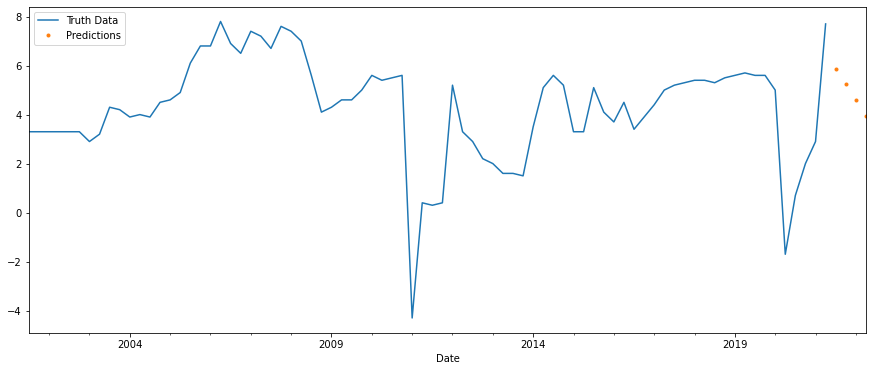

In [389]:
df['GDP Growth Rate ( annual) (%)'].plot(style='-',figsize=(15,6))
future_w_features['pred'].plot(style='.')
plt.legend(['Truth Data', 'Predictions'])
ax.set_title('Raw Data and Prediction')
plt.show()

In [429]:
def add_lags(df):
    target_map = df['GDP Growth Rate ( annual) (%)'].to_dict()
    df['lag1'] = (df.index - pd.Timedelta('365')).map(target_map)
    df['lag2'] = (df.index - pd.Timedelta('728 days')).map(target_map)
    df['lag3'] = (df.index - pd.Timedelta('1092 days')).map(target_map)
    return df

In [430]:
c=add_lags(df)

In [431]:
c

,Total Final consumption at market prices & constant prices (L.E B.),Total investment and stock at market prices & constant prices (L.E B.),Exports of goods and services (L.E B.),Imports of goods and services (L.E B.),GDP at cat market prices & constant prices (L.E B.)\n(Consumption+Investment+Exports-Imorts),GDP Per Capita (000 $),"Inflation Rate, annually change (%) (Total Egypt) - IFS, IMF",Total Domestic Debt\n(L.E B.)\nCBE,Workers Remittance ($ Million),Unemployment Rate %,GDP Growth Rate ( annual) (%),Egypt's Purchasing Managers' Index,Global JP MORGAN PMI: COMPOSITE - S&P Global,Global JP MORGAN PMI: Manufacturing- S&P Global,Global JP MORGAN PMI: ٍServices - S&P Global,lag1,lag2,lag3
Date,,,,,,,,,,,,,,,,,,
2001-09-30,387.63,71.64,76.910,97.570,438.610,9231.043905,2.165570,295.053,759.2,10.485,4.9,49.050000,52.7,52.3,52.75,NaN,NaN,NaN
2001-12-31,401.86,76.87,78.820,103.140,454.410,9231.043905,2.320502,297.549,783.7,10.485,4.9,49.050000,52.7,52.3,52.75,NaN,NaN,NaN
2002-03-31,421.28,79.87,91.360,105.970,486.530,9231.043905,2.603037,305.646,655.2,10.485,4.9,49.050000,52.7,52.3,52.75,NaN,NaN,NaN
2002-06-30,382.49,105.10,91.960,112.170,467.380,9231.043905,2.644360,329.800,754.4,10.485,4.9,49.050000,52.7,52.3,52.75,NaN,NaN,NaN
2002-09-30,407.09,68.82,91.620,114.420,453.110,9231.043905,2.736786,343.555,738.4,10.485,3.3,49.050000,52.7,52.3,52.75,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-09-30,641.24,118.52,147.355,183.215,722.365,9231.043905,5.891552,982.102,8145.9,7.500,9.8,49.266667,53.9,54.5,54.30,NaN,NaN,NaN
2021-12-31,641.24,118.52,147.355,183.215,722.365,9231.043905,5.887123,982.102,7437.2,7.400,8.3,48.800000,54.5,54.2,55.30,NaN,NaN,NaN
2022-03-31,641.24,118.52,147.355,183.215,722.365,9231.043905,8.849226,982.102,8045.7,7.200,5.4,47.500000,52.4,53.3,52.80,NaN,NaN,NaN


In [22]:
df.tail(10)

,Time Frame,Total Final consumption at market prices & constant prices (L.E B.),Total investment and stock at market prices & constant prices (L.E B.),Exports of goods and services (L.E B.),Imports of goods and services (L.E B.),GDP at cat market prices & constant prices (L.E B.)\n(Consumption+Investment+Exports-Imorts),GDP Per Capita (000 $),"Inflation Rate, annually change (%) (Total Egypt) - IFS, IMF",Total Domestic Debt\n(L.E B.)\nCBE,Workers Remittance ($ Million),Unemployment Rate %,GDP Growth Rate ( annual) (%),Egypt's Purchasing Managers' Index,Global JP MORGAN PMI: COMPOSITE - S&P Global,Global JP MORGAN PMI: Manufacturing- S&P Global,Global JP MORGAN PMI: ٍServices - S&P Global,lag1,lag2,lag3
Date,,,,,,,,,,,,,,,,,,,
2020-06-30,الربع الرابع 2020/2019,1018.60,82.60,85.100,196.300,990.000,9850.746269,5.400240,4742.107,7869.0,9.6,-1.7,38.333333,36.8,43.3,35.6,NaN,NaN,NaN
2020-09-30,الربع الأول 2021/2020,957.60,93.20,97.800,166.000,982.600,9738.354807,3.753137,982.102,8028.1,7.3,0.7,49.800000,52,51.6,51.6,NaN,NaN,NaN
2020-12-31,الربع الثاني 2021/2020,977.40,119.80,106.400,179.000,1024.600,10114.511352,5.213860,982.102,7493.3,7.2,2,50.166667,53,53.6,52.3,NaN,NaN,NaN
2021-03-31,الربع الثالث 2021/2020,1013.60,133.10,146.100,238.200,1054.600,10379.921260,4.401757,982.102,7849.6,7.4,2.9,48.666667,53.4,54.2,53,NaN,NaN,NaN
2021-06-30,الربع الرابع 2021/2020,1033.50,162.20,130.800,260.200,1066.300,10464.180569,4.640609,982.102,7849.6,7.3,7.7,48.733333,57.2,55.8,58,NaN,NaN,NaN
2021-09-30,الربع الأول 2022/2021,641.24,118.52,147.355,183.215,722.365,9231.043905,5.891552,982.102,8145.9,7.5,9.8,49.266667,53.9,54.5,54.3,NaN,NaN,NaN
2021-12-31,الربع الثاتي 2022/2021,641.24,118.52,147.355,183.215,722.365,9231.043905,5.887123,982.102,7437.2,7.4,8.3,48.800000,54.5,54.2,55.3,NaN,NaN,NaN
2022-03-31,الربع الثالث 2022/2021,641.24,118.52,147.355,183.215,722.365,9231.043905,8.849226,982.102,8045.7,7.2,5.4,47.500000,52.4,53.3,52.8,NaN,NaN,NaN
2022-06-30,الربع الراابع 2021/2022,641.24,118.52,147.355,183.215,722.365,9231.043905,9.551989,982.102,4067.0,7.2,NaN,46.366667,52,52.3,52.7,NaN,NaN,NaN


In [26]:
target_map = df['GDP Growth Rate ( annual) (%)'].to_dict()

In [27]:
target_map

{Timestamp('2001-09-30 00:00:00'): '-',
 Timestamp('2001-12-31 00:00:00'): '-',
 Timestamp('2002-03-31 00:00:00'): '-',
 Timestamp('2002-06-30 00:00:00'): '-',
 Timestamp('2002-09-30 00:00:00'): 3.3,
 Timestamp('2002-12-31 00:00:00'): 3.3,
 Timestamp('2003-03-31 00:00:00'): 2.9,
 Timestamp('2003-06-30 00:00:00'): 3.2,
 Timestamp('2003-09-30 00:00:00'): 4.3,
 Timestamp('2003-12-31 00:00:00'): 4.2,
 Timestamp('2004-03-31 00:00:00'): 3.9,
 Timestamp('2004-06-30 00:00:00'): 4,
 Timestamp('2004-09-30 00:00:00'): 3.9,
 Timestamp('2004-12-31 00:00:00'): 4.5,
 Timestamp('2005-03-31 00:00:00'): 4.6,
 Timestamp('2005-06-30 00:00:00'): 4.9,
 Timestamp('2005-09-30 00:00:00'): 6.1,
 Timestamp('2005-12-31 00:00:00'): 6.8,
 Timestamp('2006-03-31 00:00:00'): 6.8,
 Timestamp('2006-06-30 00:00:00'): 7.8,
 Timestamp('2006-09-30 00:00:00'): 6.9,
 Timestamp('2006-12-31 00:00:00'): 6.5,
 Timestamp('2007-03-31 00:00:00'): 7.4,
 Timestamp('2007-06-30 00:00:00'): 7.2,
 Timestamp('2007-09-30 00:00:00'): 6.7,
 T

In [71]:
FEATURES=data.columns.drop('var11(t)')
FEATURES=train[FEATURES]
TARGET='var11(t)'
for train_idx, val_idx in tss.split(data):
    #print(train_idx)
    print(val_idx)
    train = data.iloc[train_idx]
    test = data.iloc[val_idx]
    #FEATURES=train[FEATURES]
    #TARGET='var11(t)'
train
test

[35 36 37 38 39 40 41 42 43 44]
[45 46 47 48 49 50 51 52 53 54]
[55 56 57 58 59 60 61 62 63 64]
[65 66 67 68 69 70 71 72 73 74]
[75 76 77 78 79 80 81 82 83 84]


,var1(t-5),var2(t-5),var3(t-5),var4(t-5),var5(t-5),var6(t-5),var7(t-5),var8(t-5),var9(t-5),var10(t-5),var11(t-5),var12(t-5),var13(t-5),var14(t-5),var15(t-5),var1(t-4),var2(t-4),var3(t-4),var4(t-4),var5(t-4),var6(t-4),var7(t-4),var8(t-4),var9(t-4),var10(t-4),var11(t-4),var12(t-4),var13(t-4),var14(t-4),var15(t-4),var1(t-3),var2(t-3),var3(t-3),var4(t-3),var5(t-3),var6(t-3),var7(t-3),var8(t-3),var9(t-3),var10(t-3),var11(t-3),var12(t-3),var13(t-3),var14(t-3),var15(t-3),var1(t-2),var2(t-2),var3(t-2),var4(t-2),var5(t-2),var6(t-2),var7(t-2),var8(t-2),var9(t-2),var10(t-2),var11(t-2),var12(t-2),var13(t-2),var14(t-2),var15(t-2),var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var6(t-1),var7(t-1),var8(t-1),var9(t-1),var10(t-1),var11(t-1),var12(t-1),var13(t-1),var14(t-1),var15(t-1),var1(t),var2(t),var3(t),var4(t),var5(t),var6(t),var7(t),var8(t),var9(t),var10(t),var11(t),var12(t),var13(t),var14(t),var15(t)
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-06-30,0.769521,0.953718,0.702553,0.872298,0.854865,0.714672,0.386211,0.879194,0.731801,0.145161,0.702128,0.905634,0.779412,0.584,0.790179,0.809870,1.000000,0.564710,0.772029,0.906164,0.861965,0.332279,0.896562,0.731801,0.048387,0.709220,0.935211,0.730392,0.576,0.750000,0.739565,0.748432,0.568539,0.545949,0.856298,0.678155,0.159076,0.875487,0.808656,0.096774,0.702128,0.973239,0.710784,0.512,0.727679,0.813844,0.711108,0.440906,0.522301,0.901862,0.800569,0.080957,0.913372,0.808656,0.129032,0.702128,0.853521,0.705882,0.544,0.709821,0.860765,0.673783,0.504722,0.597976,0.933247,0.881246,0.122902,0.946004,0.963034,0.080645,0.659574,0.628169,0.441176,0.400,0.441964,0.977227,0.170648,0.052265,0.466963,0.878443,0.683839,0.107893,1.000000,0.963034,0.387097,0.184397,0.000000,0.000000,0.000,0.000000
2020-09-30,0.809870,1.000000,0.564710,0.772029,0.906164,0.861965,0.332279,0.896562,0.731801,0.048387,0.709220,0.935211,0.730392,0.576,0.750000,0.739565,0.748432,0.568539,0.545949,0.856298,0.678155,0.159076,0.875487,0.808656,0.096774,0.702128,0.973239,0.710784,0.512,0.727679,0.813844,0.711108,0.440906,0.522301,0.901862,0.800569,0.080957,0.913372,0.808656,0.129032,0.702128,0.853521,0.705882,0.544,0.709821,0.860765,0.673783,0.504722,0.597976,0.933247,0.881246,0.122902,0.946004,0.963034,0.080645,0.659574,0.628169,0.441176,0.400,0.441964,0.977227,0.170648,0.052265,0.466963,0.878443,0.683839,0.107893,1.000000,0.963034,0.387097,0.184397,0.000000,0.000000,0.000,0.000000,0.883996,0.249776,0.133312,0.323653,0.866654,0.625914,0.052954,0.154495,0.984274,0.016129,0.354610,0.969014,0.745098,0.664,0.714286
2020-12-31,0.739565,0.748432,0.568539,0.545949,0.856298,0.678155,0.159076,0.875487,0.808656,0.096774,0.702128,0.973239,0.710784,0.512,0.727679,0.813844,0.711108,0.440906,0.522301,0.901862,0.800569,0.080957,0.913372,0.808656,0.129032,0.702128,0.853521,0.705882,0.544,0.709821,0.860765,0.673783,0.504722,0.597976,0.933247,0.881246,0.122902,0.946004,0.963034,0.080645,0.659574,0.628169,0.441176,0.400,0.441964,0.977227,0.170648,0.052265,0.466963,0.878443,0.683839,0.107893,1.000000,0.963034,0.387097,0.184397,0.000000,0.000000,0.000,0.000000,0.883996,0.249776,0.133312,0.323653,0.866654,0.625914,0.052954,0.154495,0.984274,0.016129,0.354610,0.969014,0.745098,0.664,0.714286,0.914258,0.448343,0.188194,0.385139,0.933566,0.819782,0.101676,0.154495,0.912879,0.000000,0.446809,1.000000,0.794118,0.824,0.745536
2021-03-31,0.813844,0.711108,0.440906,0.522301,0.901862,0.800569,0.080957,0.913372,0.808656,0.129032,0.702128,0.853521,0.705882,0.544,0.709821,0.860765,0.673783,0.504722,0.597976,0.933247,0.881246,0.122902,0.946004,0.963034,0.080645,0.659574,0.628169,0.441176,0.400,0.441964,0.977227,0.170648,0.052265,0.466963,0.878443,0.683839,0.107893,1.000000,0.963034,0.387097,0.184397,0.000000,0.000000,0.000,0.000000,0.883996,0.249776,0.133312,0.323653,0.866654,0.625914,0.052954,0.154495,0.984274,0.016129,0.354610,0.969014,0.745098,0.664,0.714286,0.914258,0.448343,0.188194,0.385139,0.933566,0.819